# Thesis work

## imports

In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itables import show
import pprint

import itertools
from multiprocess import Pool
import multiprocess
from multiprocess import Manager
from threading import Thread

import os
import re
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map  # or thread_map
import numpy as np
from scipy.interpolate import interp1d
# from scipy.optimize import UnivariateSpline
from scipy.interpolate import interp1d, UnivariateSpline
import matplotlib.pyplot as plt
from astropy.io import fits
from FitsClass import FITSFile as myfits
from ObservationClass import ObservationManager as obsm
from SimulationClass import Simulations as sc

import specs as specs
from CCF import CCFclass

obs = obsm()

# Orginazing Observation Data

## X-SHOOTER 1D files

In [3]:
obs = obsm()
obs.organize_star_files('../RawData')

## X-SHOOTER 2D files

In [ ]:
obs = obsm()
obs.organize_star_2D_images('../RawData')

## NRES 1D, 2D and raw together

In [2]:
obs = obsm()
obs.organize_nres_files2('../RawData')

Found 288 .fits.fz files in ../RawData.
Copied '../RawData/lco_data-20250104-56/cptnrs03-fa13-20250103-0033-e92-1d.fits.fz' => 'Data/WR17/epoch1/1/1D/cptnrs03-fa13-20250103-0033-e92-1d.fits.fz' [star=WR17, epoch=1, spec=1]
Copied '../RawData/lco_data-20250104-56/cptnrs03-fa13-20250103-0033-e00.fits.fz' => 'Data/WR17/epoch1/1/raw/cptnrs03-fa13-20250103-0033-e00.fits.fz' [star=WR17, epoch=1, spec=1]
Copied '../RawData/lco_data-20250104-56/cptnrs03-fa13-20250103-0033-e92-2d.fits.fz' => 'Data/WR17/epoch1/1/2D/cptnrs03-fa13-20250103-0033-e92-2d.fits.fz' [star=WR17, epoch=1, spec=1]
Copied '../RawData/lco_data-20250104-56/cptnrs03-fa13-20250103-0034-e92-1d.fits.fz' => 'Data/WR17/epoch1/2/1D/cptnrs03-fa13-20250103-0034-e92-1d.fits.fz' [star=WR17, epoch=1, spec=2]
Copied '../RawData/lco_data-20250104-56/cptnrs03-fa13-20250103-0034-e00.fits.fz' => 'Data/WR17/epoch1/2/raw/cptnrs03-fa13-20250103-0034-e00.fits.fz' [star=WR17, epoch=1, spec=2]
Copied '../RawData/lco_data-20250104-56/cptnrs03-fa13-2

# Orginazing 2D star fits files

In [4]:
obs = obsm()
obs.organize_star_2D_images(f'../RawData/archive')

Star names found: ['Brey  70', 'Brey  83', 'HD  38029', 'HD  37248', 'Brey  95a', 'MNM2014 LMC195-1', 'HD  32125', 'HD  37026', 'HD 269818', 'HD  38448', 'HD  38030', 'HD  37680', 'Brey  58a', 'HD  32228', 'HD  32257', 'HD 269888', 'HD  36156', 'H2013 LMCe  584', 'RMC 140', 'HD  32402', 'Brey  70a', 'Brey  16a', 'Brey  93', 'Brey  90a', 'HD 269891']
Found 459 FITS files in ../RawData/archive
Organizing files for star: Brey  70
Found 18 FITS files for Brey  70
Processing 3 files for Brey  70 on 2020-10-28 (epoch1)
Sub-exposure not found for ../RawData/archive/ADP.2020-11-13T13:19:45.727.fits. Assigning to sub-exposure 1.
Copied ../RawData/archive/ADP.2020-11-13T13:19:45.727.fits to Data/Brey  70/epoch1/NIR/2D image/ADP.2020-11-13T13:19:45.727.fits
Sub-exposure not found for ../RawData/archive/ADP.2020-11-13T13:19:45.413.fits. Assigning to sub-exposure 1.
Copied ../RawData/archive/ADP.2020-11-13T13:19:45.413.fits to Data/Brey  70/epoch1/VIS/2D image/ADP.2020-11-13T13:19:45.413.fits
Sub-e

In [11]:
path = f'../RawData/archive/ADP.2020-11-13T12:33:07.692.fits'
fit = myfits(path)
data = fit.data
image_data = fits.getdata(path, ext=0)

In [12]:
image_data

array([[-541.86664  , -268.81192  , 2001.8967   , ...,   13.63808  ,
          52.699177 ,   28.331072 ],
       [-202.36807  ,  550.6139   ,  139.13632  , ...,  -12.680979 ,
         -28.001728 ,   -7.966964 ],
       [-192.87576  ,  474.86603  ,  320.04724  , ...,  -18.424162 ,
          15.039984 ,   29.270485 ],
       ...,
       [ 309.92532  ,  317.94766  ,   92.83809  , ...,   -8.947825 ,
          -4.6025643,   16.124666 ],
       [-690.5028   ,  132.07367  ,  439.33838  , ...,    7.489552 ,
         -13.025372 ,   -5.767559 ],
       [-187.88748  , -173.53964  ,   62.862427 , ...,  -11.4056015,
          21.270926 ,  -16.842594 ]], dtype='>f4')

In [13]:
fit.print_file_info()

Opened FITS file: ../RawData/archive/ADP.2020-11-13T12:33:07.692.fits
Number of HDUs: 3
HDU 0: PrimaryHDU
------------------------------------------------------------
Header:
SIMPLE = True
BITPIX = -32
NAXIS = 2
NAXIS1 = 12854
NAXIS2 = 99
EXTEND = True
COMMENT =   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT =   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
DATE = 2020-11-12T12:45:11
LAMNLIN = 3310
LAMRMS = 0.0034449051386803
CRDER1 = 5.98774463754332e-05
CSYER1 = 0.03
CUNIT1 = nm
SPATRMS = 0.0102419914646424
CRDER2 = 0.000178020662402537
CSYER2 = 0.17
CUNIT2 = arcsec
CRPIX1 = 1.0
CRVAL1 = 298.92
CDELT1 = 0.02
CTYPE1 = LINEAR
CRPIX2 = 1.0
CRVAL2 = -10.2600002288818
CDELT2 = 0.16
CTYPE2 = LINEAR
CD1_1 = 0.02
CD1_2 = 0.0
CD2_1 = 0.0
CD2_2 = 0.16
ORIGIN = ESO
TELESCOP = ESO-VLT-U3
INSTRUME = XSHOOTER
OBJECT = Brey  70a
RA = 84.397331
DEC = -69.14351
EQUINOX = 2000.0
RADECSYS = FK5
EXPTIME = 1357.0
MJD-OBS = 59144.319757056
DATE-OBS

In [5]:
count = 0
for star_name in specs.star_names:
    print(f'Number {count}: is {star_name}')
    count += 1

Number 0: is Brey  70
Number 1: is Brey  83
Number 2: is HD  38029
Number 3: is HD  37248
Number 4: is Brey  95a
Number 5: is MNM2014 LMC195-1
Number 6: is HD  32125
Number 7: is HD  37026
Number 8: is HD 269818
Number 9: is HD  38448
Number 10: is HD  38030
Number 11: is HD  37680
Number 12: is Brey  58a
Number 13: is HD  32228
Number 14: is HD  32257
Number 15: is HD 269888
Number 16: is HD  36156
Number 17: is H2013 LMCe  584
Number 18: is RMC 140
Number 19: is HD  32402
Number 20: is Brey  70a
Number 21: is Brey  16a
Number 22: is Brey  93
Number 23: is Brey  90a
Number 24: is HD 269891


# Load X-Shooter 2D images data

In [2]:
# path = f'Data/Brey  70/epoch1/
obs = obsm()
star_name = specs.star_names[2]
star = obs.load_star_instance(star_name)
file = star.load_2D_observation(1,'UVB')
raw_data = file.raw_data

Spectral type not found in the SIMBAD response.
Data/HD  38029/epoch1/UVB/2D image/ADP.2020-11-13T13:47:10.249.fits
Data loaded from Data/HD  38029/epoch1/UVB/2D image/ADP.2020-11-13T13:47:10.249.fits


## Plot 2D image

Data/HD  38029/epoch4/UVB/ADP.2021-08-04T12_51_37.454.fits
Data loaded from Data/HD  38029/epoch4/UVB/ADP.2021-08-04T12_51_37.454.fits
Data/HD  38029/epoch4/UVB/2D image/ADP.2021-08-04T12:51:37.455.fits
Data loaded from Data/HD  38029/epoch4/UVB/2D image/ADP.2021-08-04T12:51:37.455.fits
spacial axis has 99 items


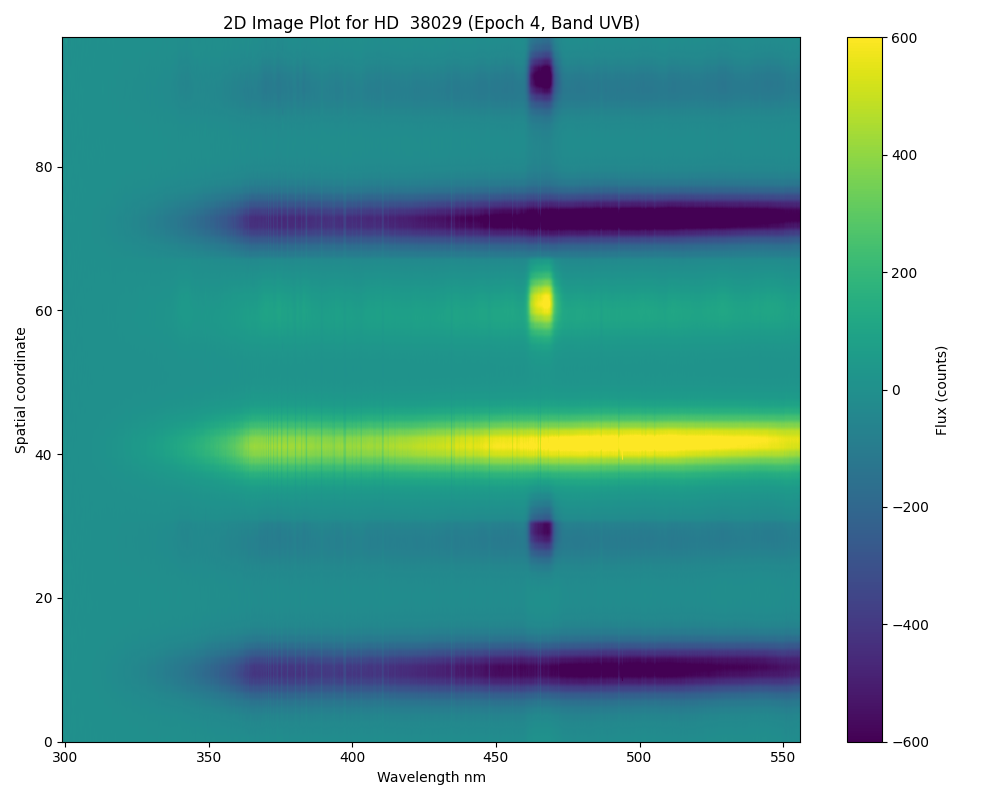

In [4]:
%matplotlib widget
star.plot_2D_image(4,'UVB',ValMax=600, ValMin=-600,norm = False,see_all=True)

In [24]:
star.plot_2D_image(6,'UVB',ValMin=-600,ValMax=600)

Data/H2013 LMCe  584/epoch6/UVB/ADP.2021-11-19T09_03_44.903.fits
Data loaded from Data/H2013 LMCe  584/epoch6/UVB/ADP.2021-11-19T09_03_44.903.fits
Data/H2013 LMCe  584/epoch6/UVB/2D image/ADP.2021-11-19T09:03:44.904.fits
Error loading Data/H2013 LMCe  584/epoch6/UVB/2D image/ADP.2021-11-19T09:03:44.904.fits: [Errno 2] No such file or directory: 'Data/H2013 LMCe  584/epoch6/UVB/2D image/ADP.2021-11-19T09:03:44.904.fits'


TypeError: '>' not supported between instances of 'NoneType' and 'int'

Data/Brey  58a/epoch1/VIS/ADP.2020-12-15T09_04_22.589.fits
Data loaded from Data/Brey  58a/epoch1/VIS/ADP.2020-12-15T09_04_22.589.fits
Data/Brey  58a/epoch1/VIS/2D image/ADP.2020-12-15T09:04:22.590.fits
Data loaded from Data/Brey  58a/epoch1/VIS/2D image/ADP.2020-12-15T09:04:22.590.fits
spacial axis has 28 items


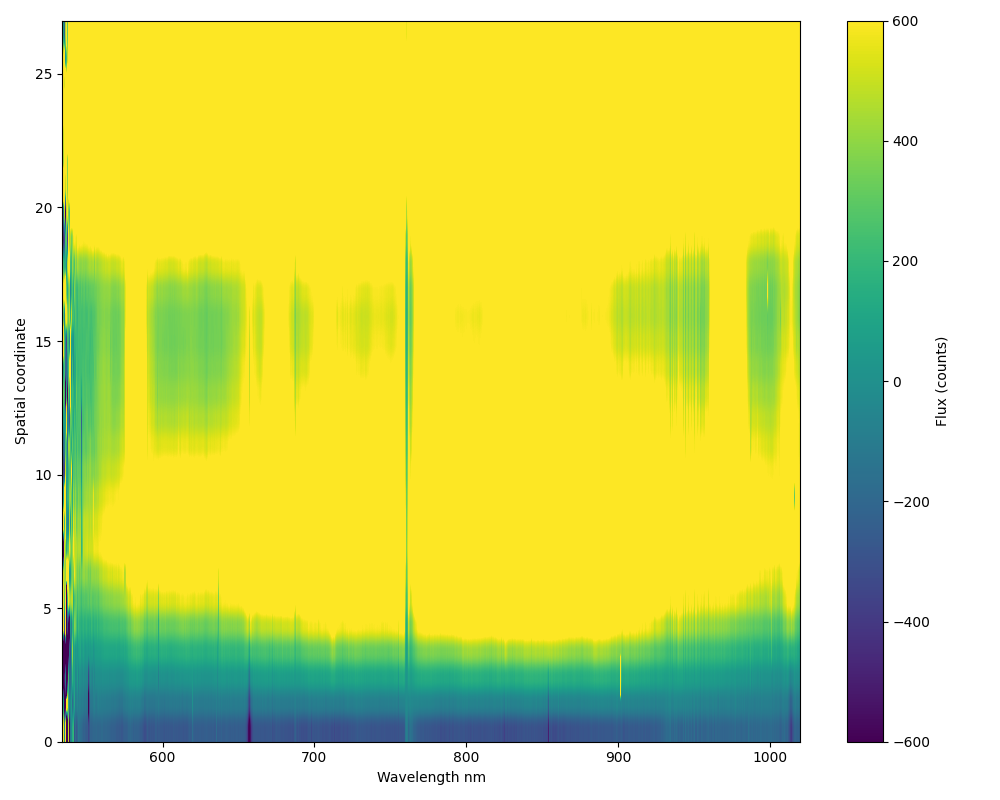

In [17]:
star.plot_2D_image(1,'VIS',ValMin=-600,ValMax=600)

Data/Brey  83/epoch1/NIR/ADP.2020-11-13T13_19_45.746.fits
Data loaded from Data/Brey  83/epoch1/NIR/ADP.2020-11-13T13_19_45.746.fits
Data/Brey  83/epoch1/NIR/2D image/ADP.2020-11-13T13:19:45.747.fits
Data loaded from Data/Brey  83/epoch1/NIR/2D image/ADP.2020-11-13T13:19:45.747.fits
spacial axis has 28 items


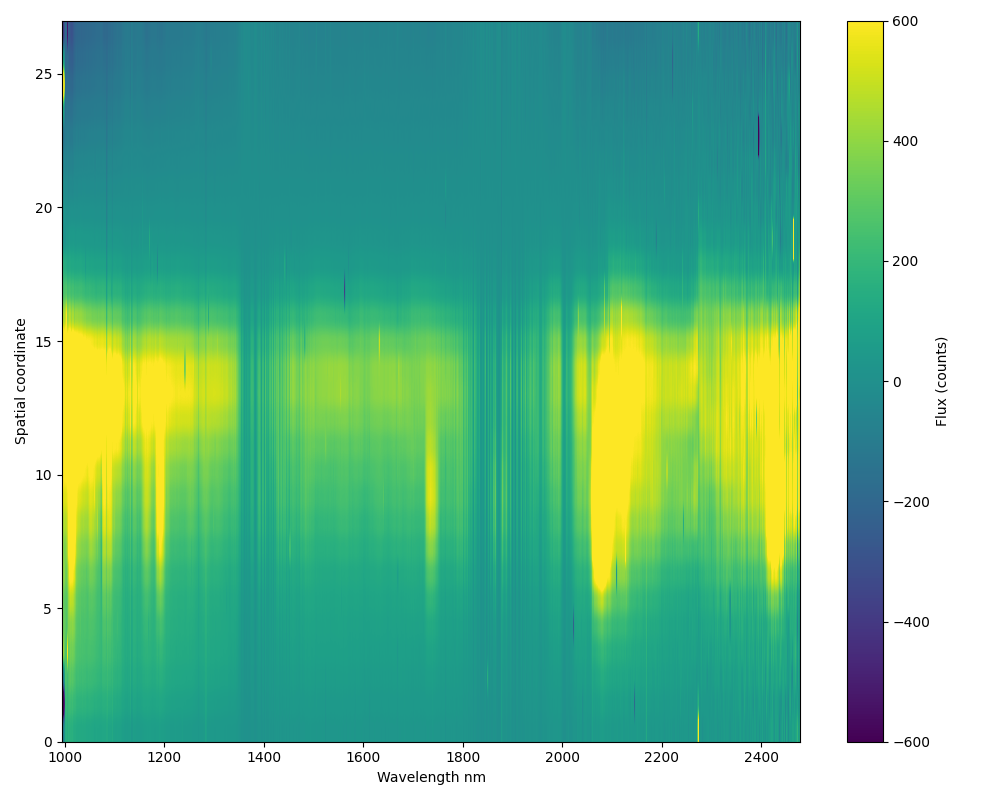

In [3]:
%matplotlib widget
star_name = specs.star_names[1]
star = obs.load_star_instance(star_name)
star.plot_2D_image(1,'NIR',ValMin=-600,ValMax=600)

In [61]:
fits_file = star.load_2D_observation(1,band = 'VIS')
spectra_fits_file = star.load_observation(1,'VIS')
print(fits_file.dataheader)

Data/RMC 140/epoch1/VIS/2D image/ADP.2020-11-13T13:47:10.407.fits
Data loaded from Data/RMC 140/epoch1/VIS/2D image/ADP.2020-11-13T13:47:10.407.fits
Data/RMC 140/epoch1/VIS/ADP.2020-11-13T13_47_10.406.fits
Data loaded from Data/RMC 140/epoch1/VIS/ADP.2020-11-13T13_47_10.406.fits
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                24318 / length of data axis 1                          NAXIS2  =                   99 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'ERRS    '                                                            BUNIT   = 'ADU     '                                                            

In [62]:
print(spectra_fits_file.dataheader)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =              1264536 / width of table in bytes                        NAXIS2  =                    1 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    7 / number of fields in each row                   TTYPE1  = 'WAVE    '           / label for field   1                            TFORM1  = '24318D  '           / data format of field: 8-byte DOUBLE            TUNIT1  = 'nm      '           / physical unit of field                         TTYPE2  = 'FLUX    '           / label for field   2                            TFORM2  = '24318D  '           / data fo

# NRES data mainupulations

## Combining fluxes using SNR weighting, fixing with blaze function and saving

In [3]:
star_names = ['WR 52','WR17']

for star_name in star_names:
    star = obs.load_star_instance(star_name)
    epochs = star.get_all_epoch_numbers()
    for epoch_num in epochs:
        spectra = star.get_all_spectra_in_epoch(epoch_num)
        for spectrum_num in spectra:
            wave, flux, SNR = star.get_stitched_spectra(epoch_num,spectrum_num)
            data = {'wavelength': wave, 'flux': flux, 'SNR':SNR}
            overwrite = True
            star.save_property('combined_flux',data,epoch_num=epoch_num,spectra_num=spectrum_num,overwrite=overwrite)

BAT99 not found properly. Indices -1, 39. Found sion="1.0" encoding="UTF-8" ?>
Data loaded from Data/WR 52/epoch1/1/1D/cptnrs03-fa13-20250103-0050-e92-1d.fits.fz


/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:1207: RuntimeWarning: invalid value encountered in divide
  flux_obj = flux_arrays[order_idx*2 + 1] / blaze_arrays[order_idx*2 + 1]
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:1209: RuntimeWarning: invalid value encountered in divide
  flux_sky = flux_arrays[order_idx*2] / blaze_arrays[order_idx*2]
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:1217: RuntimeWarning: invalid value encountered in divide
  unc_obj = uncertainty_arrays[order_idx*2 + 1] / blaze_arrays[order_idx*2 + 1]
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:1218: RuntimeWarning: invalid value encountered in divide
  unc_sky = uncertainty_arrays[order_idx*2]     / blaze_arrays[order_idx*2]
/Users/guyshtainer/Library/C

Backing up before overwrite: Data/WR 52/epoch1/1/1D/output/combined_flux.npz
Backed up Data/WR 52/epoch1/1/1D/output/combined_flux.npz -> Backups/overwritten/WR 52/epoch1/1/1D/output/combined_flux_backup_20250120_144829.npz
Saved property to Data/WR 52/epoch1/1/1D/output/combined_flux.npz
Data loaded from Data/WR 52/epoch1/2/1D/cptnrs03-fa13-20250103-0051-e92-1d.fits.fz
Backing up before overwrite: Data/WR 52/epoch1/2/1D/output/combined_flux.npz
Backed up Data/WR 52/epoch1/2/1D/output/combined_flux.npz -> Backups/overwritten/WR 52/epoch1/2/1D/output/combined_flux_backup_20250120_144830.npz
Saved property to Data/WR 52/epoch1/2/1D/output/combined_flux.npz
Data loaded from Data/WR 52/epoch1/3/1D/cptnrs03-fa13-20250103-0052-e92-1d.fits.fz
Backing up before overwrite: Data/WR 52/epoch1/3/1D/output/combined_flux.npz
Backed up Data/WR 52/epoch1/3/1D/output/combined_flux.npz -> Backups/overwritten/WR 52/epoch1/3/1D/output/combined_flux_backup_20250120_144830.npz
Saved property to Data/WR 52/e

# Plotting spectra

## Plotting X-Shooter full spectra

In [4]:
obs = obsm()
star_name = specs.star_names[16]
print(f'I am working on {star_name}')
star = obs.load_star_instance(star_name)

I am working on HD  36156


Data/HD  38029/epoch4/UVB/ADP.2021-08-04T12_51_37.454.fits
Data loaded from Data/HD  38029/epoch4/UVB/ADP.2021-08-04T12_51_37.454.fits
Data/HD  38029/epoch4/VIS/ADP.2021-08-04T12_51_37.594.fits
Data loaded from Data/HD  38029/epoch4/VIS/ADP.2021-08-04T12_51_37.594.fits
Data/HD  38029/epoch4/NIR/ADP.2021-08-04T12_51_37.612.fits
Data loaded from Data/HD  38029/epoch4/NIR/ADP.2021-08-04T12_51_37.612.fits


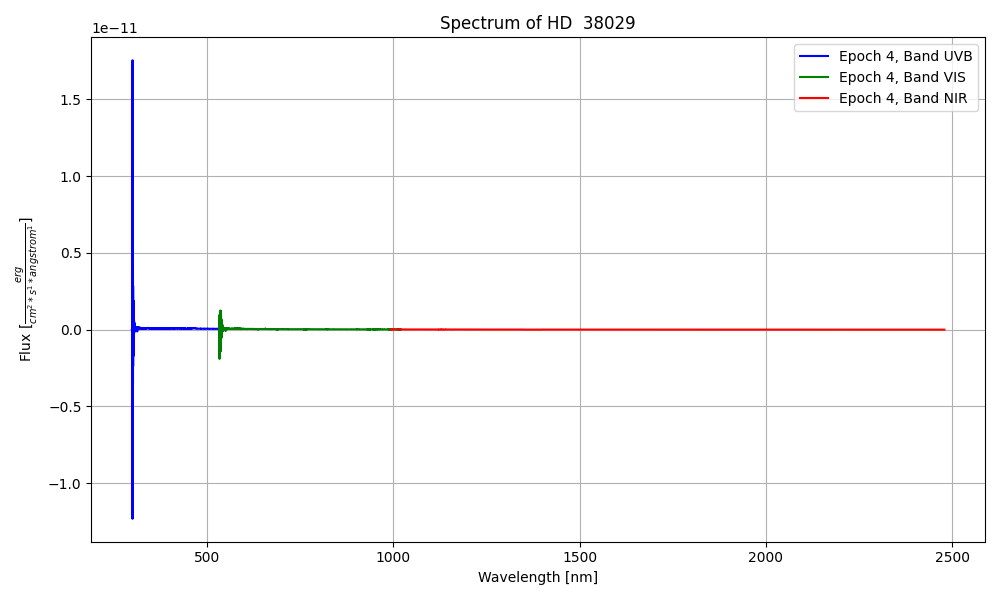

In [5]:
%matplotlib widget
# star.plot_spectra(5,'COMBINED')
star.plot_spectra(4,['UVB','VIS','NIR'])

## Plotting normalizied spectra

/Users/guyshtainer/Library/CloudStorage/OneDrive-mail.tau.ac.il/תואר שני!/Thesis/Thesis-codes/StarClass.py:1002: RuntimeWarning: invalid value encountered in divide
  plt.plot(wavelengths, normalized_flux / normalized_flux, '--', label='Fitted Continuum (Normalized)', color='red')


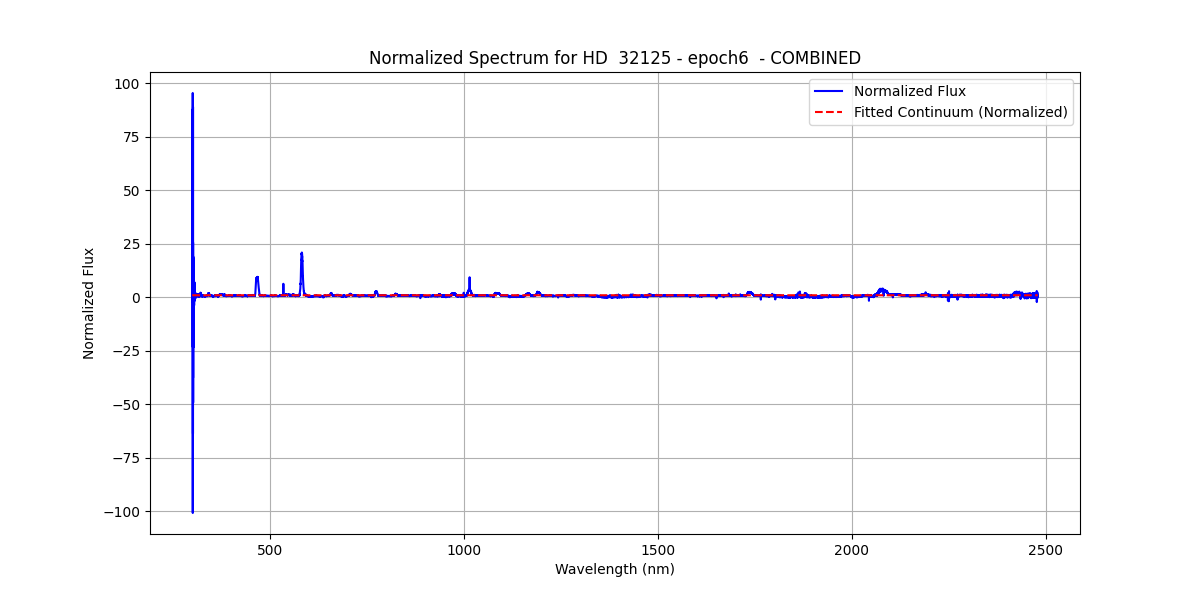

In [5]:
%matplotlib widget
# star_name = specs.star_names[0]
# star = obs.load_star_instance(star_name)
star.plot_normalized_spectrum(6,'COMBINED')

Data/HD  32125/epoch6/COMBINED/combined_bands.fits
Data loaded from Data/HD  32125/epoch6/COMBINED/combined_bands.fits


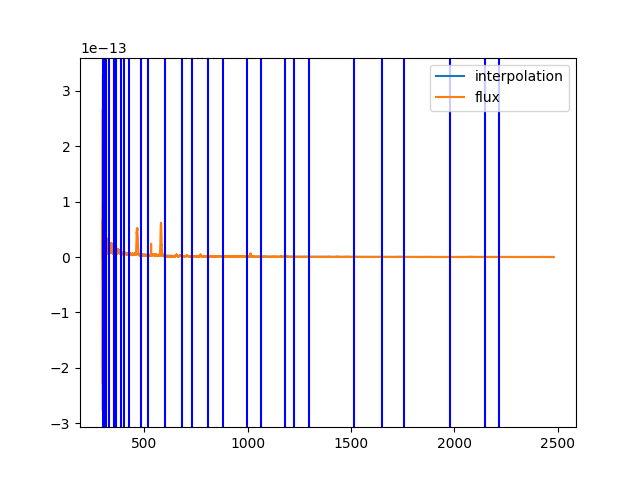

[ 298.92  309.46  317.26  330.8   352.54  365.72  386.52  400.24  429.06
  482.64  520.66  601.52  683.96  731.44  810.22  879.22  998.9  1066.8
 1180.32 1226.58 1295.7  1516.74 1651.26 1758.6  1981.14 2148.06 2216.16]


In [2]:
%matplotlib widget
obs = obsm()
star_name = specs.star_names[6]
star = obs.load_star_instance(star_name)
normalized_flux_tmp = star.load_property('normalized_flux',6,'COMBINED')
interpolated_flux_tmp = star.load_property('interpolated_flux',6,'COMBINED')
anchor_points_tmp = star.load_property('norm_anchor_wavelengths',6,'COMBINED')
# anchor_points = anchor_points_tmp['norm_anchor_wavelengths']
flux = star.load_observation(6,'COMBINED').data['FLUX'][0]
wavelengths = normalized_flux_tmp['wavelengths']
normalized_flux = normalized_flux_tmp['normalized_flux']
interpolated_flux = interpolated_flux_tmp['interpolated_flux']
plt.plot(wavelengths,interpolated_flux,label = 'interpolation')
plt.plot(wavelengths,flux,label = 'flux')
for wave in anchor_points_tmp:
    plt.axvline(x = wave, color = 'b')
# plt.scatter(
plt.legend()
plt.show()

print(anchor_points_tmp)
# print(normalized_flux)
# print(interpolated_flux)

## Plotting NRES spectra

### Plotting raw spectra

In [2]:
obs = obsm()
star = obs.load_star_instance('WR17')

BAT99 not found properly. Indices -1, 39. Found sion="1.0" encoding="UTF-8" ?>


Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz
[8878.18091821 8878.23951328 8878.29809949 8878.35667684 8878.41524534
 8878.47380498 8878.53235578 8878.59089772 8878.64943081]


/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_47570/263094748.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[1],flux[1]/blaze[1])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_47570/263094748.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[3],flux[3]/blaze[3])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_47570/263094748.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[5],flux[5]/blaze[5])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_47570/263094748.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[7],flux[7]/blaze[7])


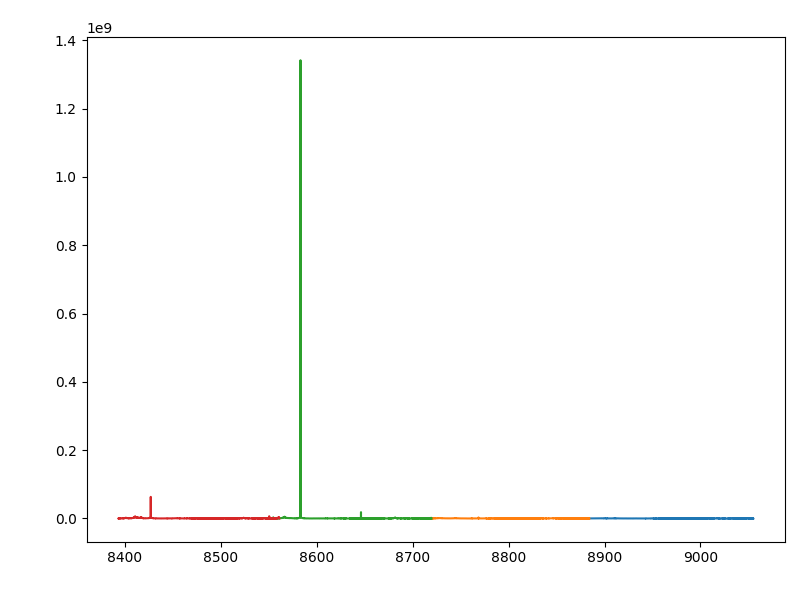

In [31]:
data = star.load_observation(1,12).data
flux = data['flux']
blaze = data['blaze']
wave = data['wavelength']
print(wave[1][10:19])
plt.clf()
plt.plot(wave[1],flux[1]/blaze[1])
plt.plot(wave[3],flux[3]/blaze[3])
plt.plot(wave[5],flux[5]/blaze[5])
plt.plot(wave[7],flux[7]/blaze[7])
# plt.plot(wave[1],flux[1])
# plt.plot(wave[3],flux[3])
plt.show()

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz


/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:993: RuntimeWarning: invalid value encountered in divide
  tmp_current_fluxes = (flux_arrays[order_idx*2+1]/blaze_arrays[order_idx*2+1]-flux_arrays[order_idx*2]/blaze_arrays[order_idx*2])
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:995: RuntimeWarning: invalid value encountered in divide
  snr_list.append(flux_list[-1]/np.sqrt(np.pow(uncertainty_arrays[order_idx*2+1]/blaze_arrays[order_idx*2+1],2) +
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:996: RuntimeWarning: invalid value encountered in divide
  np.pow(uncertainty_arrays[order_idx*2]/blaze_arrays[order_idx*2],2) +
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:997: RuntimeWarning: invalid value encountered in divide
  np.pow(fl

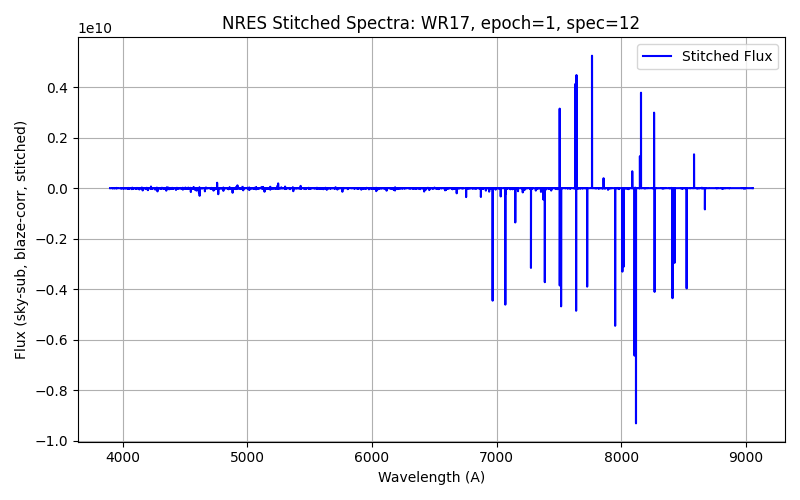

In [3]:
%matplotlib widget
wave,flux,snr = star.plot_stitched_spectra(1,12)

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz


/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/NRESClass.py:799: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


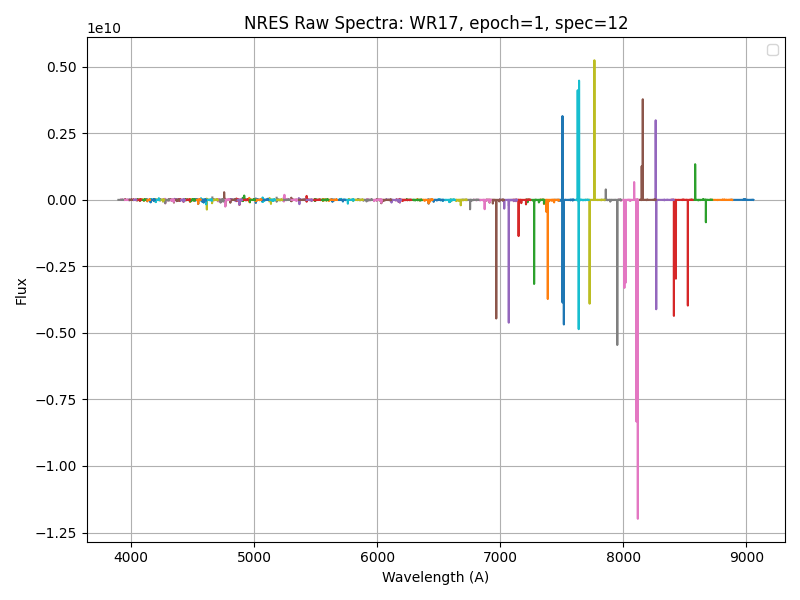

In [32]:
%matplotlib widget
star.plot_raw_spectra(1,12,blaze_correction=True,subtract_sky=True)

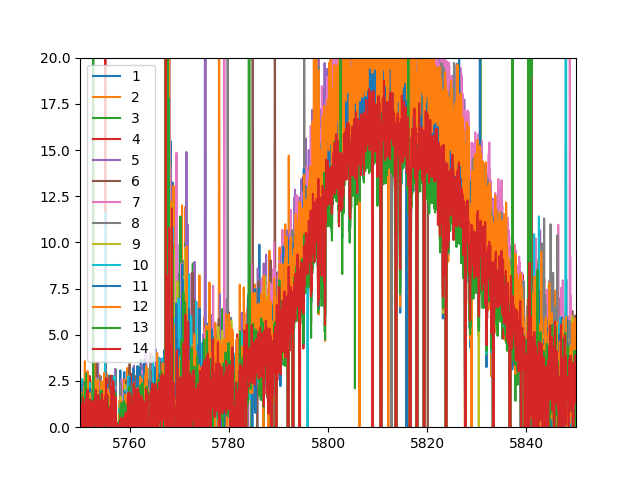

In [3]:
%matplotlib widget
plt.clf()
for spectra_num in range(1,15):
    data = star.load_property('normalized_flux',3,spectra_num=spectra_num)
    wave = data['wavelengths']
    flux = data['normalized_flux']
    plt.plot(wave,flux,label = f'{spectra_num}')
    plt.ylim(0,20)
    plt.xlim(5750,5850)
plt.legend()
plt.show()


In [6]:
attribute_list = ['MJD-OBS']
star.create_observation_table(attributes_list=attribute_list)

Epoch  Spectra DataType                                        File  \
0        1        1       2D  cptnrs03-fa13-20250103-0033-e92-2d.fits.fz   
1        1        1      raw     cptnrs03-fa13-20250103-0033-e00.fits.fz   
2        1        1       1D  cptnrs03-fa13-20250103-0033-e92-1d.fits.fz   
3        1        2       2D  cptnrs03-fa13-20250103-0034-e92-2d.fits.fz   
4        1        2      raw     cptnrs03-fa13-20250103-0034-e00.fits.fz   
..     ...      ...      ...                                         ...   
121      3       13      raw     lscnrs01-fa09-20250114-0031-e00.fits.fz   
122      3       13       1D  lscnrs01-fa09-20250114-0031-e92-1d.fits.fz   
123      3       14       2D  lscnrs01-fa09-20250114-0032-e92-2d.fits.fz   
124      3       14      raw     lscnrs01-fa09-20250114-0032-e00.fits.fz   
125      3       14       1D  lscnrs01-fa09-20250114-0032-e92-1d.fits.fz   

          MJD-OBS  
0    60678.918210  
1    60678.918210  
2    60678.918210  
3    60678.922579  
4    60678.922579  
..            ...  
121  60690.179003  
122  60690.179003  
123  60690.183369  
124  60690.183369  
125  60690.183369  

[126 rows x 5 columns]

Epoch  Spectra DataType                                        File  \
0        1        1       2D  cptnrs03-fa13-20250103-0033-e92-2d.fits.fz   
1        1        1      raw     cptnrs03-fa13-20250103-0033-e00.fits.fz   
2        1        1       1D  cptnrs03-fa13-20250103-0033-e92-1d.fits.fz   
3        1        2       2D  cptnrs03-fa13-20250103-0034-e92-2d.fits.fz   
4        1        2      raw     cptnrs03-fa13-20250103-0034-e00.fits.fz   
..     ...      ...      ...                                         ...   
121      3       13      raw     lscnrs01-fa09-20250114-0031-e00.fits.fz   
122      3       13       1D  lscnrs01-fa09-20250114-0031-e92-1d.fits.fz   
123      3       14       2D  lscnrs01-fa09-20250114-0032-e92-2d.fits.fz   
124      3       14      raw     lscnrs01-fa09-20250114-0032-e00.fits.fz   
125      3       14       1D  lscnrs01-fa09-20250114-0032-e92-1d.fits.fz   

          MJD-OBS  
0    60678.918210  
1    60678.918210  
2    60678.918210  
3    60678.922579  
4    60678.922579  
..            ...  
121  60690.179003  
122  60690.179003  
123  60690.183369  
124  60690.183369  
125  60690.183369  

[126 rows x 5 columns]

# Loading property files for stars

In [4]:
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)
norm = star.load_property('normalized_flux',1,'COMBINED')
print(norm)
points = star.load_property('norm_anchor_wavelengths',1,'COMBINED')
print(points)

{'wavelengths': array([ 298.92,  298.94,  298.96, ..., 2478.84, 2478.9 , 2478.96],
      dtype='>f8'), 'normalized_flux': array([ 0.09609028, -0.05070256,  0.01819126, ...,  0.51625229,
        0.27221397,  0.        ])}
[ 309.52  317.76  332.42  350.58  364.2   387.58  398.84  404.9   412.8
  429.6   475.92  494.38  507.92  520.18  535.68  552.4   568.92  607.92
  631.68  667.96  695.46  714.22  750.68  809.56  849.8   860.22  876.46
  903.5   921.12  992.72 1044.06 1067.82 1103.7  1176.9  1222.8  1331.76
 1521.06 1651.62 1759.2  1985.46 2135.88 2259.66 2396.58 2468.88]


# Plotting the normalized flux when trying to take the 2D image and throw the top and bottom panes, sun along the vertical axis and normalized using what I chose for the 1D flux. And comparing to my normalization

In [2]:
obs = obsm()
star_name = specs.star_names[12]
print(star_name)
star = obs.load_star_instance(star_name)
epoch_num = 4

Brey  58a


Data/Brey  58a/epoch1/UVB/2D image
['Data/Brey  58a/epoch1/UVB/2D image/ADP.2020-12-15T09:04:22.538.fits']
Data/Brey  58a/epoch1/UVB/2D image/ADP.2020-12-15T09:04:22.538.fits
Data loaded from Data/Brey  58a/epoch1/UVB/2D image/ADP.2020-12-15T09:04:22.538.fits
Data/Brey  58a/epoch1/UVB/ADP.2020-12-15T09_04_22.537.fits
Data loaded from Data/Brey  58a/epoch1/UVB/ADP.2020-12-15T09_04_22.537.fits
The top limit is: 76, and the bottom limit is: 21
external_wavelengths_band is : [298.92 298.94 298.96 ... 555.94 555.96 555.98]
Spatial axis has 34 items


KeyboardInterrupt: 

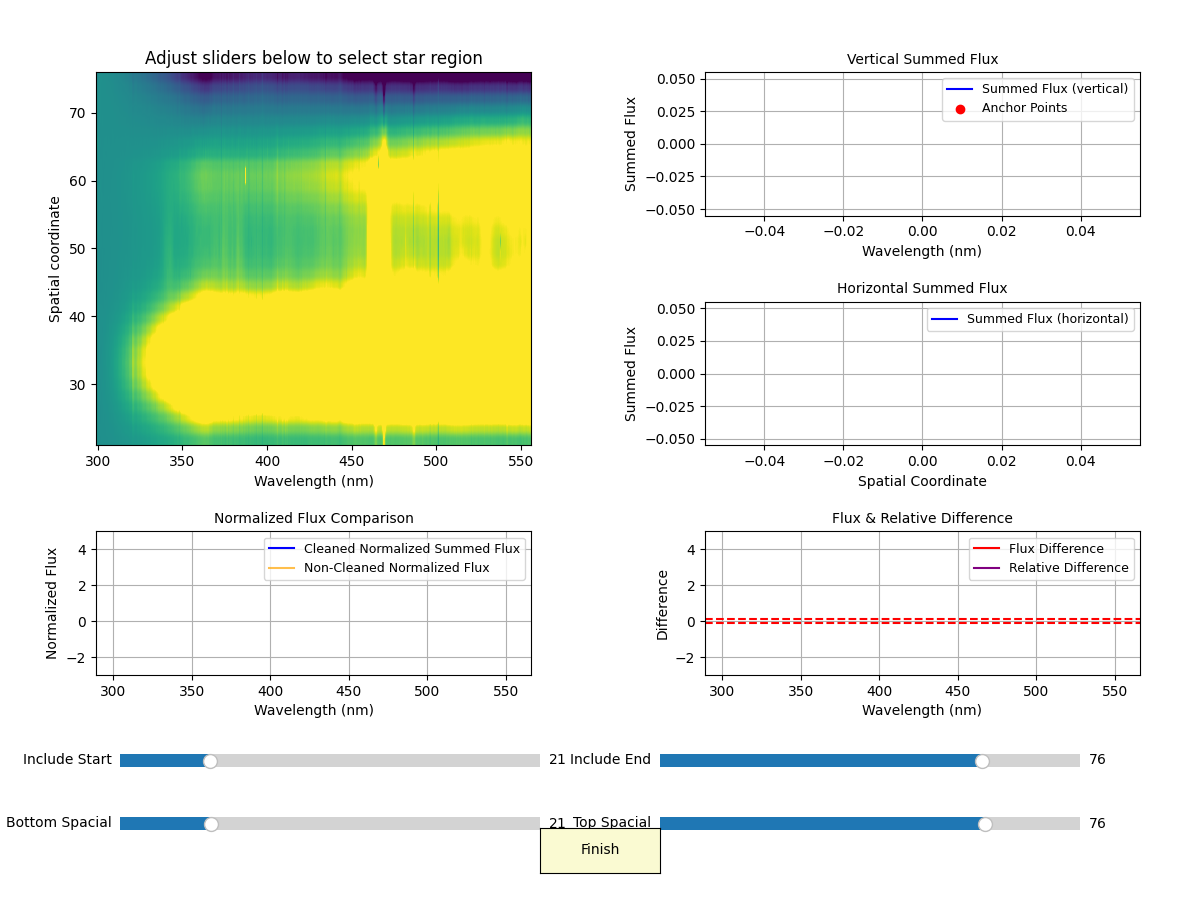

In [3]:
%matplotlib widget
epoch_num = 1
exclude_spacial = (35,49)
# star.clean_flux_and_normalize(epoch_num,'UVB',exclude_spacial=exclude_spacial)
normalized_summed_flux_resampled, external_wavelengths_band, (final_bottom, final_top), final_include_spacial = star.clean_flux_and_normalize_interactive(epoch_num,'UVB')
print(normalized_summed_flux_resampled, external_wavelengths_band, (final_bottom, final_top), final_include_spacial)

In [6]:
data = []
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    data.append([star_name])

df = pd.DataFrame(data, columns=["Star Name"])
print(df)

           Star Name
0           Brey  70
1           Brey  83
2          HD  38029
3          HD  37248
4          Brey  95a
5   MNM2014 LMC195-1
6          HD  32125
7          HD  37026
8          HD 269818
9          HD  38448
10         HD  38030
11         HD  37680
12         Brey  58a
13         HD  32228
14         HD  32257
15         HD 269888
16         HD  36156
17   H2013 LMCe  584
18           RMC 140
19         HD  32402
20         Brey  70a
21         Brey  16a
22          Brey  93
23         Brey  90a
24         HD 269891


In [ ]:
%matplotlib widget
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)
try:
    for epoch_num in range(1,8):
        for band in ['UVB','VIS','NIR']:
            star.clean_flux_and_normalize_interactive(epoch_num,band)

In [19]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'VIS')

Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data loaded from Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
Data loaded from Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
The top lines is: -30, and the bottom line is: -68
 anchor_points_in_range: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]
found points from wavelngth_2D: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]


ValueError: operands could not be broadcast together with shapes (38,) (24318,) 

Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data loaded from Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
Data loaded from Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
The top lines is: -24, and the bottom line is: -52
 anchor_points_in_range: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]
found points from wavelngth_2D: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]


/Users/guyshtainer/Library/CloudStorage/OneDrive-mail.tau.ac.il/תואר שני!/Thesis/Thesis-codes/StarClass.py:1640: RuntimeWarning: invalid value encountered in divide
  relative_difference = flux_difference / external_normalized_flux_band


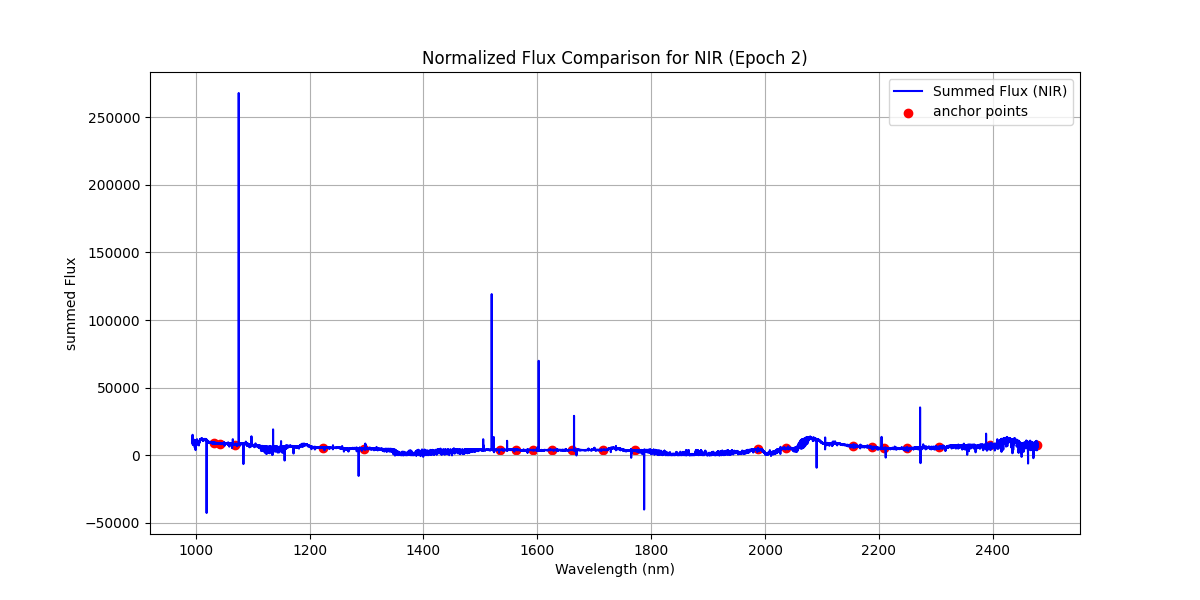

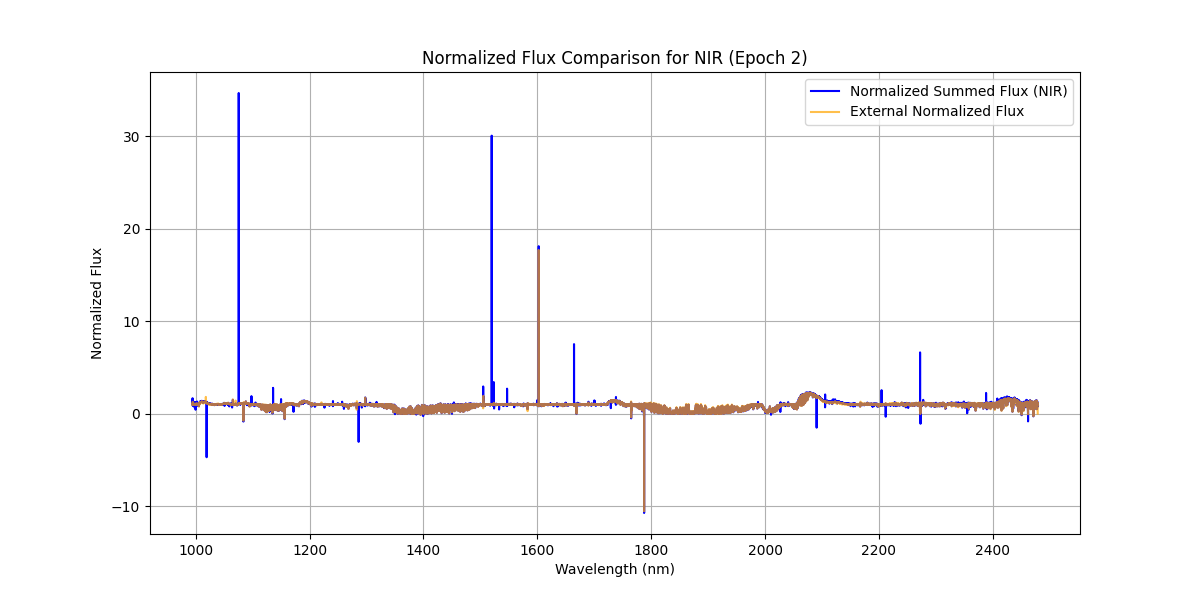

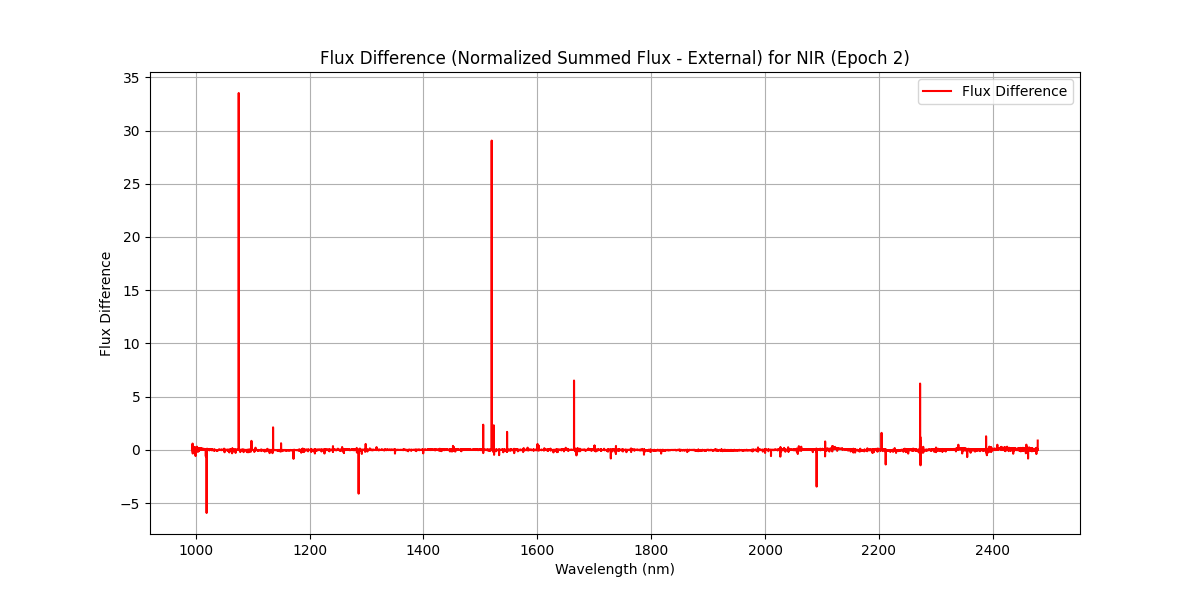

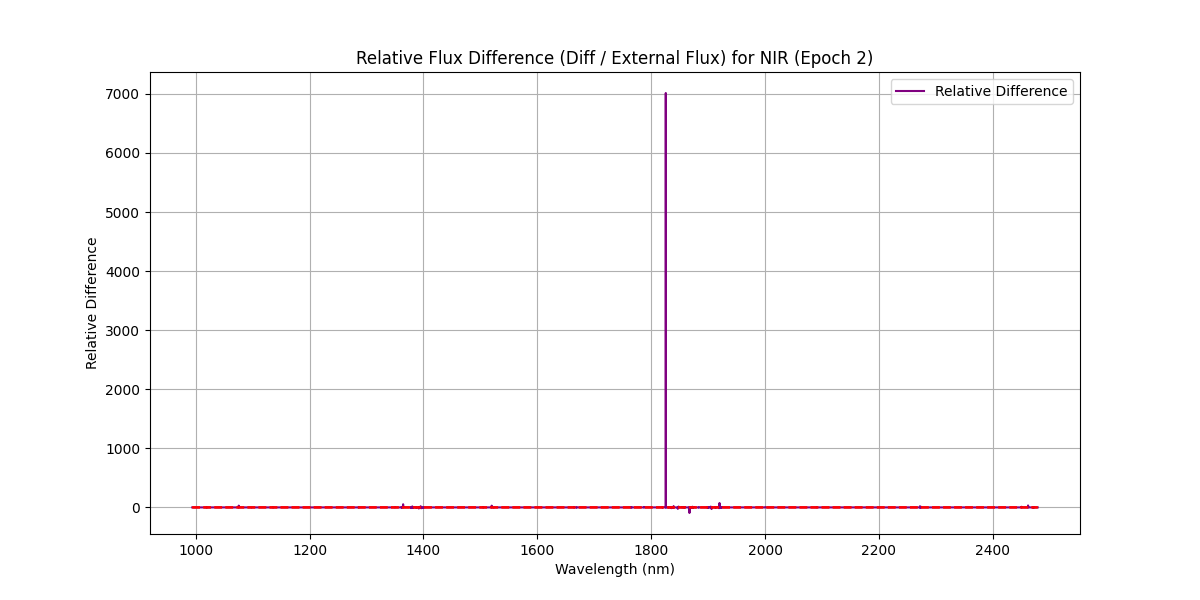

(array([1.16068533, 1.27398004, 1.38727474, ..., 0.91448187, 0.88017143,
        0.87559338]),
 array([ 994.02,  994.04,  994.06, ..., 2478.84, 2478.9 , 2478.96],
       dtype='>f8'),
 (-52, -24))

In [5]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'NIR')

# Calculating RV compared to the first epoch

In [9]:
obs = obsm()
star_names = specs.star_names
star_name = star_names[3]
print(f'We use {star_name}')
star = obs.load_star_instance(star_name)

We use HD  37248


In [8]:
star.list_available_properties()


Available properties for star 'HD  37248':

Epoch      Band       Property                                 Type       Details        
-----------------------------------------------------------------------------------------
1          COMBINED   normalized_flux.npz                      File                      
1          COMBINED   combine_fits_files                       Folder     1 files        
1          COMBINED   norm_anchor_wavelengths.npz              File                      
1          COMBINED   interpolated_flux.npz                    File                      
1          COMBINED   test_method                              Folder     20 files       
1          COMBINED   norm_anchors_results.npz                 File                      
1          NIR        combine_fits_files                       Folder     1 files        
1          NIR        Figures                                  Folder     4 files        
1          NIR        test_method                      

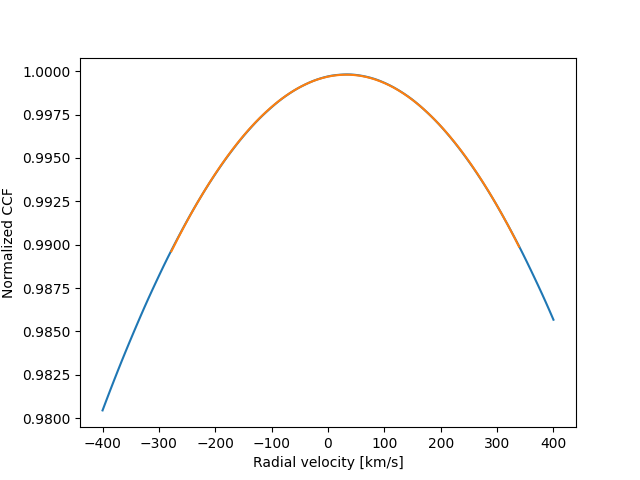

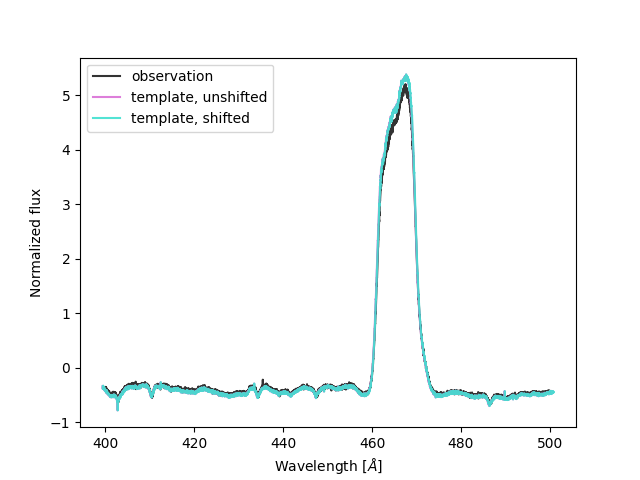

For epoch number 2 the RV is 32.56596678390857, the error is 0.43457125270420727 and the relative error is 0.013344337528432804


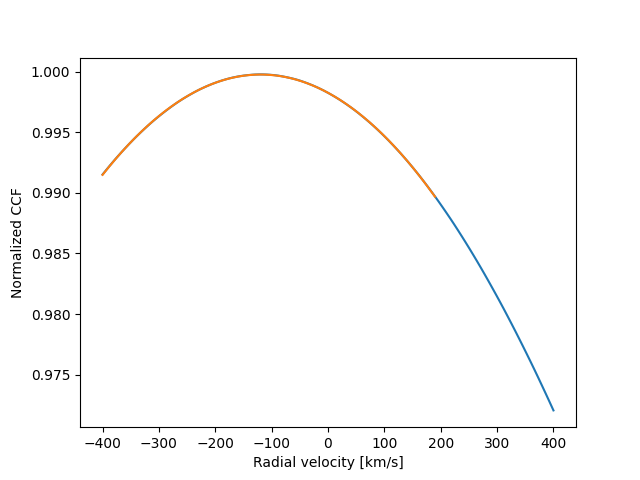

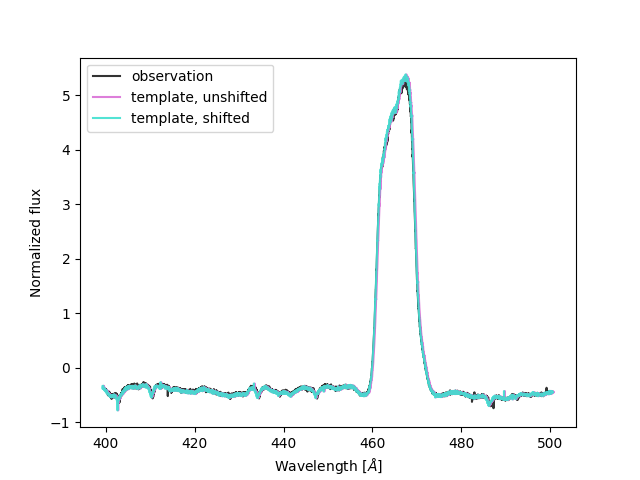

For epoch number 3 the RV is -119.58389914786986, the error is 0.47560382837522935 and the relative error is -0.003977156053317244


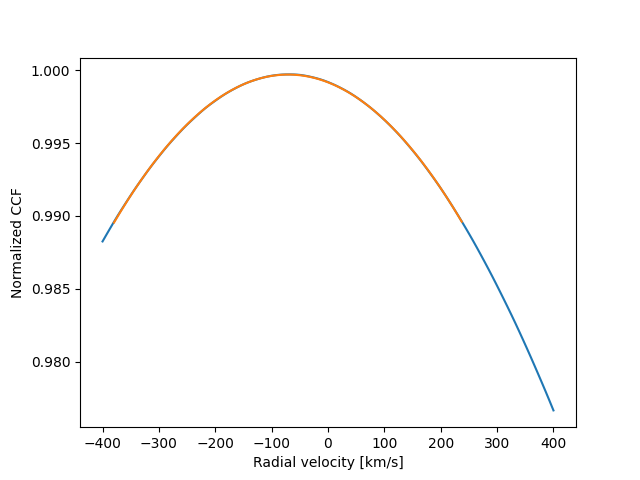

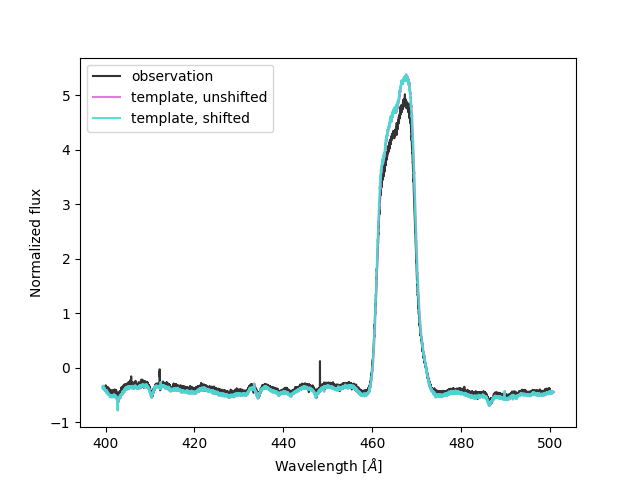

For epoch number 4 the RV is -70.71826431414644, the error is 0.5368461542267308 and the relative error is -0.00759133668555466


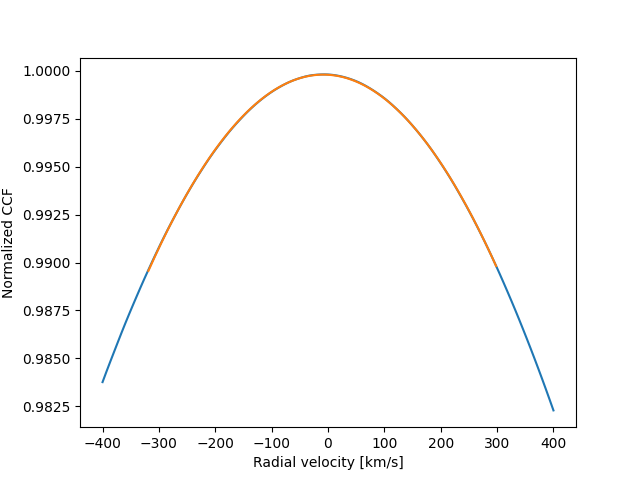

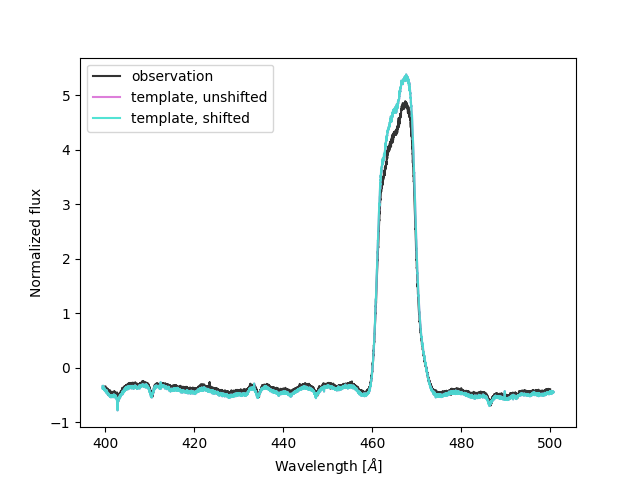

For epoch number 5 the RV is -8.283497895249338, the error is 0.43895030489388415 and the relative error is -0.05299093576707808


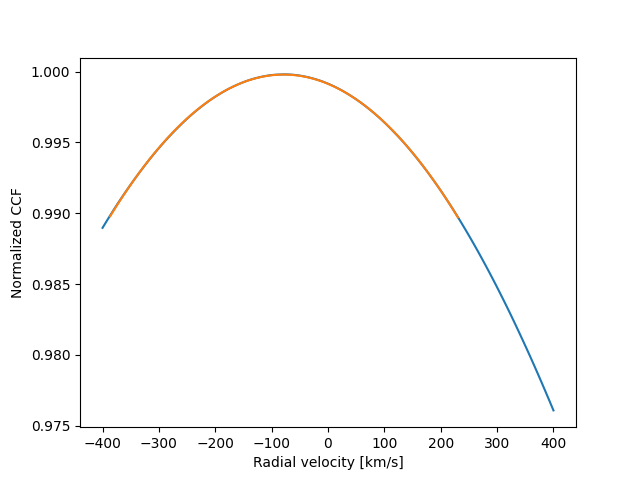

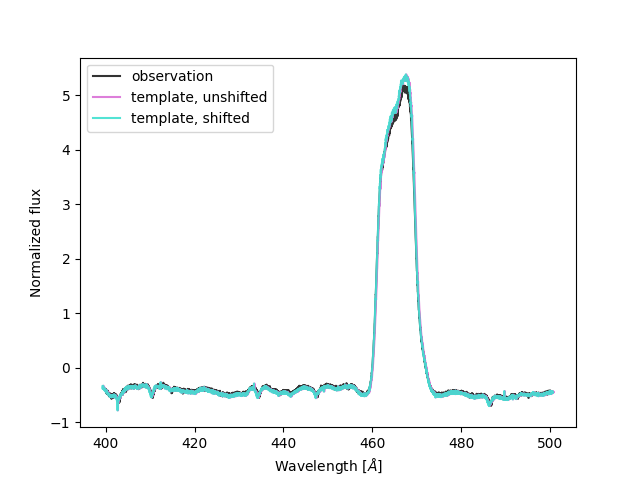

For epoch number 6 the RV is -78.65046846387501, the error is 0.4426961121362743 and the relative error is -0.005628651942990133


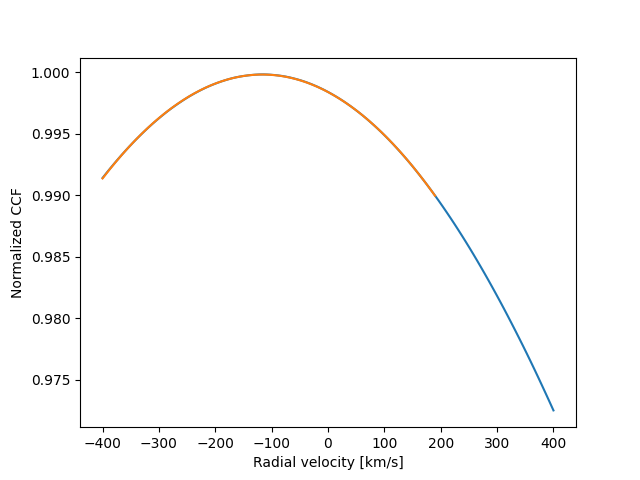

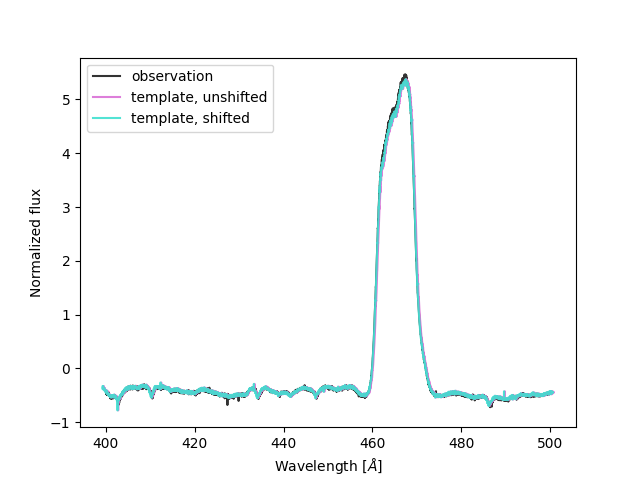

For epoch number 7 the RV is -116.38804304416094, the error is 0.42653232563519244 and the relative error is -0.003664743512126533


In [10]:
%matplotlib widget
template_norm_flux_data = star.load_property('normalized_flux',1,'COMBINED')
initial_template = template_norm_flux_data['normalized_flux']
template_wave = template_norm_flux_data['wavelengths']

for i in range(2,8):
    norm_flux_data = star.load_property('normalized_flux',i,'COMBINED')
    obs_flux = norm_flux_data['normalized_flux']
    obs_wave = norm_flux_data['wavelengths']
    
    CCF = CCFclass(PlotFirst=True,CrossVeloMin=-400,CrossVeloMax=400,Fit_Range_in_fraction=0.99)
    full_RV, full_RV_err = CCF.compute_RV(obs_wave,obs_flux,template_wave,initial_template)
    print(f'For epoch number {i} the RV is {full_RV}, the error is {full_RV_err} and the relative error is {full_RV_err/full_RV}')


In [10]:
%matplotlib widget
star_names = specs.star_names
for star_name in ['Brey  58a']:
    star = obs.load_star_instance(star_name)
    template_norm_flux_data = star.load_property('normalized_flux',1,'COMBINED')
    initial_template = template_norm_flux_data['normalized_flux']
    template_wave = template_norm_flux_data['wavelengths']
    
    for i in range(2,4):
        try:
            norm_flux_data = star.load_property('normalized_flux',i,'COMBINED')
            obs_flux = norm_flux_data['normalized_flux']
            obs_wave = norm_flux_data['wavelengths']
            
            CCF = CCFclass(PlotFirst=False,CrossVeloMin=-400,CrossVeloMax=400,Fit_Range_in_fraction=0.99)
            full_RV, full_RV_err = CCF.compute_RV(obs_wave,obs_flux,template_wave,initial_template)
            tmp_dict = {'full_RV' : full_RV, 'full_RV_err' : full_RV_err}
            star.save_property('RVs',tmp_dict, epoch_number = i,band = 'COMBINED',overwrite = True)
        except Exception as e:
            print(f'Didnt save RVs for star {star_name}, epoch {i}, because {e}') 
        print(f'For epoch number {i} the RV is {full_RV}, the error is {full_RV_err} and the relative error is {full_RV_err/full_RV}')


File exists. Creating a backup before overwriting: Data/Brey  58a/epoch2/COMBINED/output/RVs.npz
Backup created at Backups/overwritten/Brey  58a/epoch2/COMBINED/RVs_backup_27_11_2024__18_40_14.npz
Property saved at Data/Brey  58a/epoch2/COMBINED/output/RVs.npz
For epoch number 2 the RV is -5.463874484159757, the error is 0.2839375648427464 and the relative error is -0.05196634103984377
File exists. Creating a backup before overwriting: Data/Brey  58a/epoch3/COMBINED/output/RVs.npz
Backup created at Backups/overwritten/Brey  58a/epoch3/COMBINED/RVs_backup_27_11_2024__18_40_14.npz
Property saved at Data/Brey  58a/epoch3/COMBINED/output/RVs.npz
For epoch number 3 the RV is -2.068291747120791, the error is 0.28314122873182457 and the relative error is -0.13689617488730846


In [6]:
star = obs.load_star_instance(star_name)
RV = star.load_property('RVs',epoch_num=3,band = 'COMBINED')
print(RV)

{'full_RV': array(11.62044868), 'full_RV_err': array(0.24639165)}


No file or folder named 'RVs' found in 'Data/Brey  70/epoch1/COMBINED/output'.
No RV data for star Brey  70, epoch 1. Skipping.
No output directory found for star 'Brey  70', epoch '7', band 'COMBINED'.
No RV data for star Brey  70, epoch 7. Skipping.


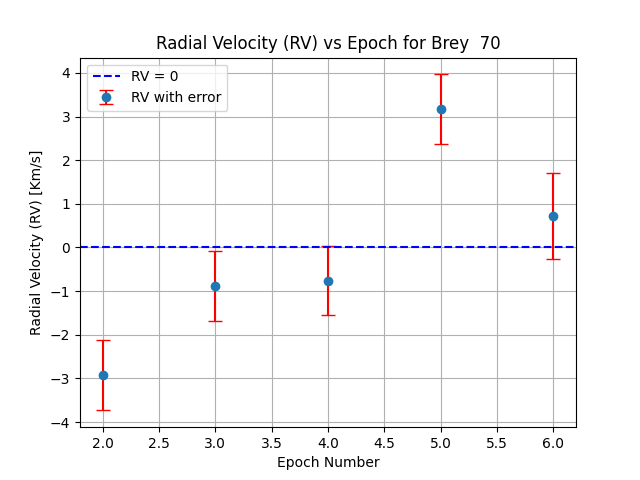

Absolute RV range for Brey  70: 6.09
No file or folder named 'RVs' found in 'Data/Brey  83/epoch1/COMBINED/output'.
No RV data for star Brey  83, epoch 1. Skipping.
No output directory found for star 'Brey  83', epoch '7', band 'COMBINED'.
No RV data for star Brey  83, epoch 7. Skipping.


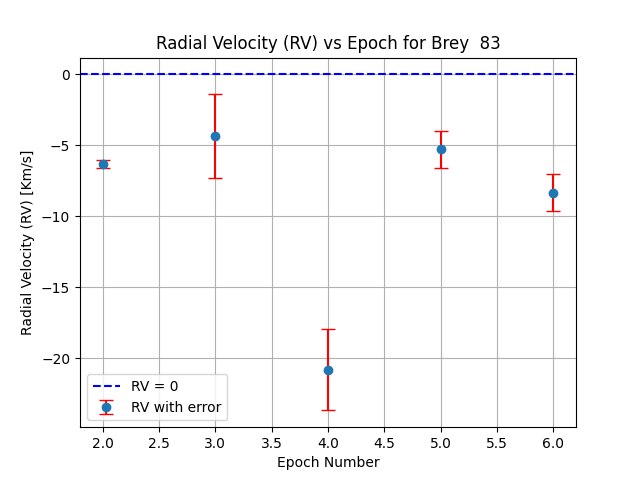

Absolute RV range for Brey  83: 16.46
No file or folder named 'RVs' found in 'Data/HD  38029/epoch1/COMBINED/output'.
No RV data for star HD  38029, epoch 1. Skipping.
No output directory found for star 'HD  38029', epoch '7', band 'COMBINED'.
No RV data for star HD  38029, epoch 7. Skipping.


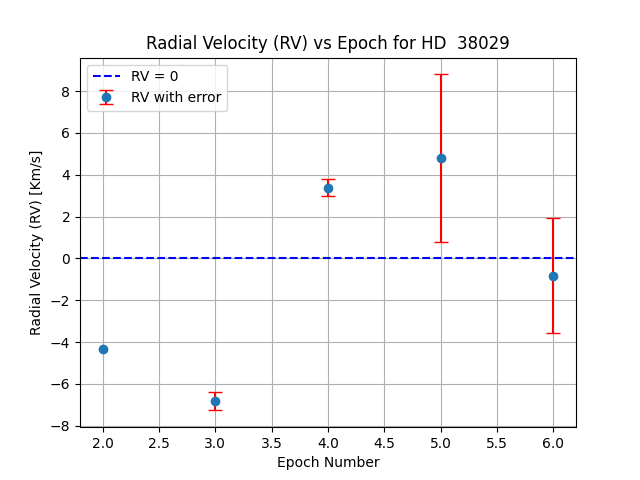

Absolute RV range for HD  38029: 11.62
No file or folder named 'RVs' found in 'Data/HD  37248/epoch1/COMBINED/output'.
No RV data for star HD  37248, epoch 1. Skipping.


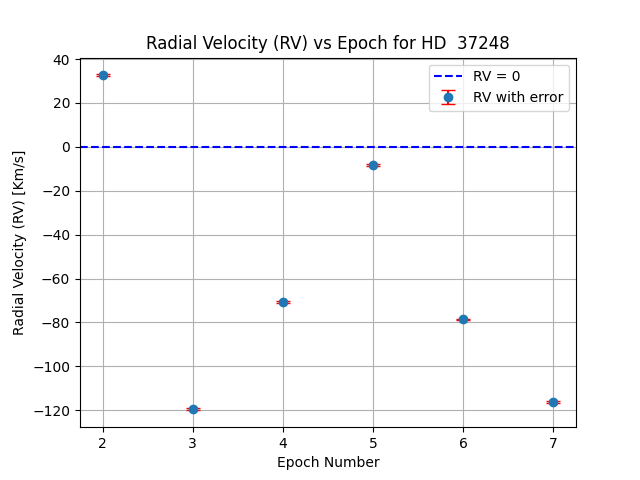

Absolute RV range for HD  37248: 152.15
No file or folder named 'RVs' found in 'Data/Brey  95a/epoch1/COMBINED/output'.
No RV data for star Brey  95a, epoch 1. Skipping.
No output directory found for star 'Brey  95a', epoch '7', band 'COMBINED'.
No RV data for star Brey  95a, epoch 7. Skipping.


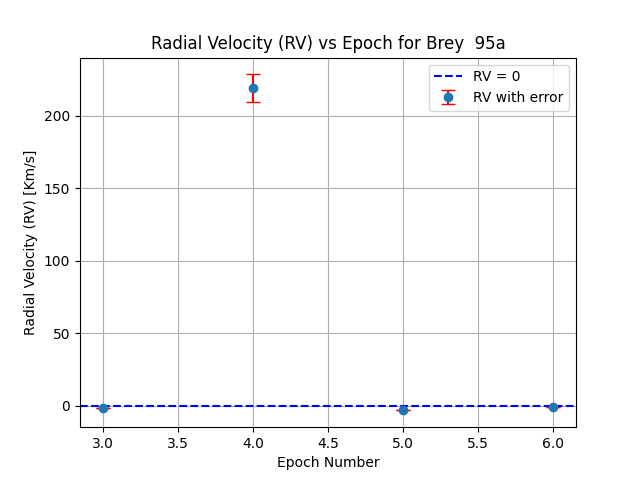

Absolute RV range for Brey  95a: nan
No file or folder named 'RVs' found in 'Data/MNM2014 LMC195-1/epoch1/COMBINED/output'.
No RV data for star MNM2014 LMC195-1, epoch 1. Skipping.
No output directory found for star 'MNM2014 LMC195-1', epoch '7', band 'COMBINED'.
No RV data for star MNM2014 LMC195-1, epoch 7. Skipping.


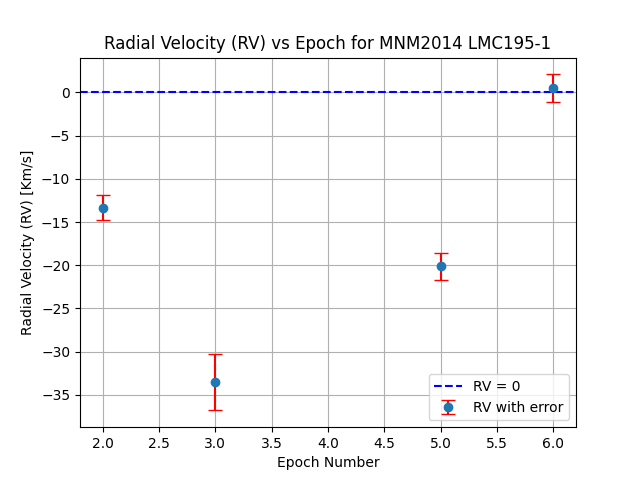

Absolute RV range for MNM2014 LMC195-1: 34.02
No file or folder named 'RVs' found in 'Data/HD  32125/epoch1/COMBINED/output'.
No RV data for star HD  32125, epoch 1. Skipping.


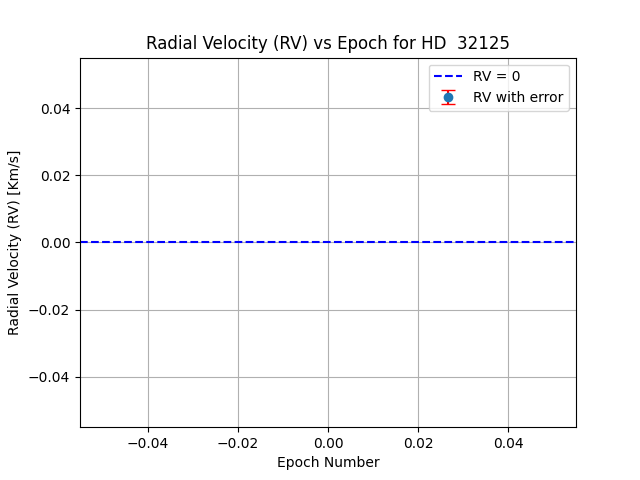

Absolute RV range for HD  32125: nan
No file or folder named 'RVs' found in 'Data/HD  37026/epoch1/COMBINED/output'.
No RV data for star HD  37026, epoch 1. Skipping.
No output directory found for star 'HD  37026', epoch '7', band 'COMBINED'.
No RV data for star HD  37026, epoch 7. Skipping.


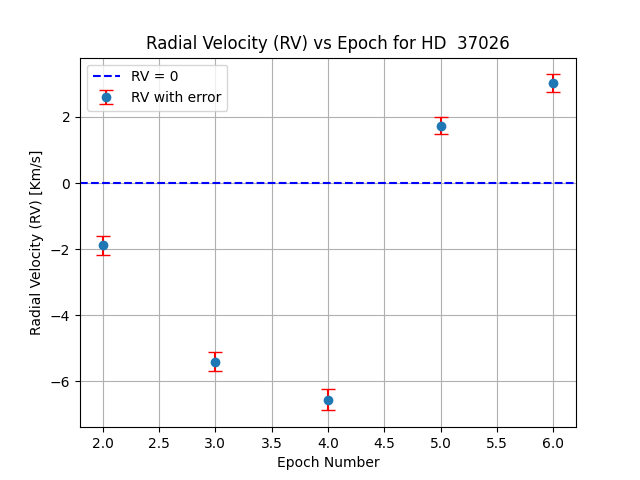

Absolute RV range for HD  37026: 9.57
No file or folder named 'RVs' found in 'Data/HD 269818/epoch1/COMBINED/output'.
No RV data for star HD 269818, epoch 1. Skipping.
No output directory found for star 'HD 269818', epoch '6', band 'COMBINED'.
No RV data for star HD 269818, epoch 6. Skipping.
No output directory found for star 'HD 269818', epoch '7', band 'COMBINED'.
No RV data for star HD 269818, epoch 7. Skipping.


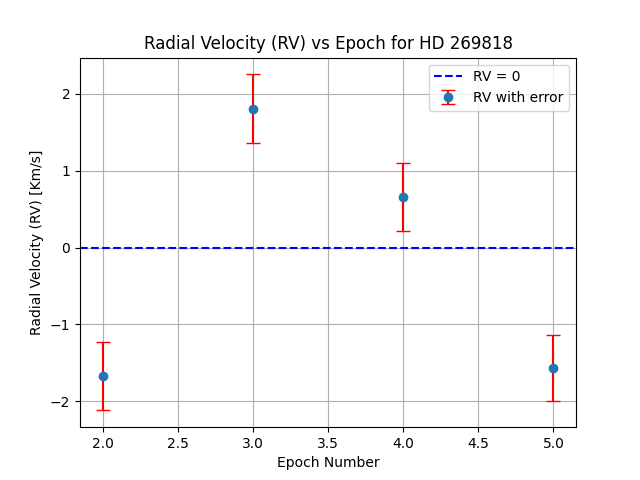

Absolute RV range for HD 269818: 3.47
No file or folder named 'RVs' found in 'Data/HD  38448/epoch1/COMBINED/output'.
No RV data for star HD  38448, epoch 1. Skipping.


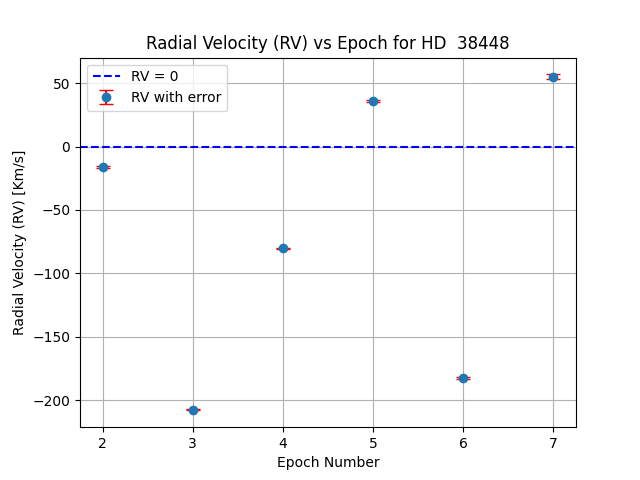

Absolute RV range for HD  38448: 262.50
No file or folder named 'RVs' found in 'Data/HD  38030/epoch1/COMBINED/output'.
No RV data for star HD  38030, epoch 1. Skipping.
No output directory found for star 'HD  38030', epoch '7', band 'COMBINED'.
No RV data for star HD  38030, epoch 7. Skipping.


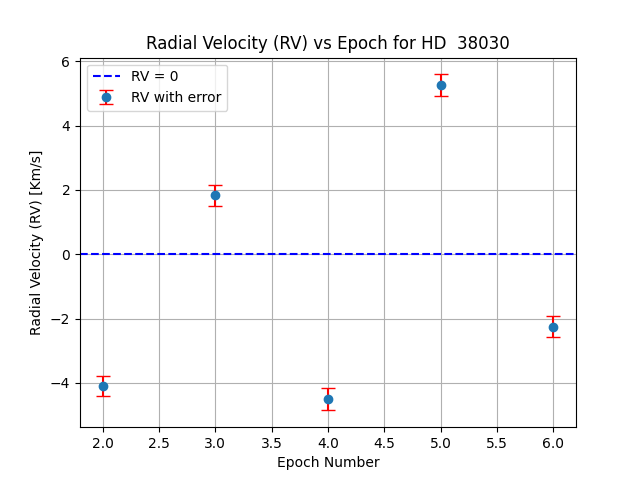

Absolute RV range for HD  38030: 9.77
No file or folder named 'RVs' found in 'Data/HD  37680/epoch1/COMBINED/output'.
No RV data for star HD  37680, epoch 1. Skipping.
No output directory found for star 'HD  37680', epoch '7', band 'COMBINED'.
No RV data for star HD  37680, epoch 7. Skipping.


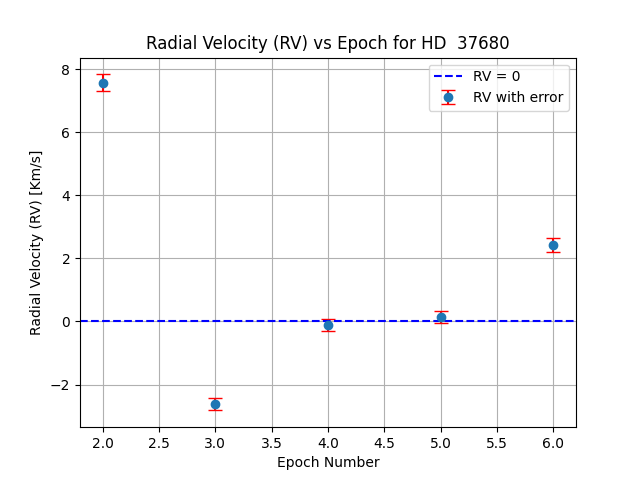

Absolute RV range for HD  37680: 10.19
No file or folder named 'RVs' found in 'Data/Brey  58a/epoch1/COMBINED/output'.
No RV data for star Brey  58a, epoch 1. Skipping.
No output directory found for star 'Brey  58a', epoch '7', band 'COMBINED'.
No RV data for star Brey  58a, epoch 7. Skipping.


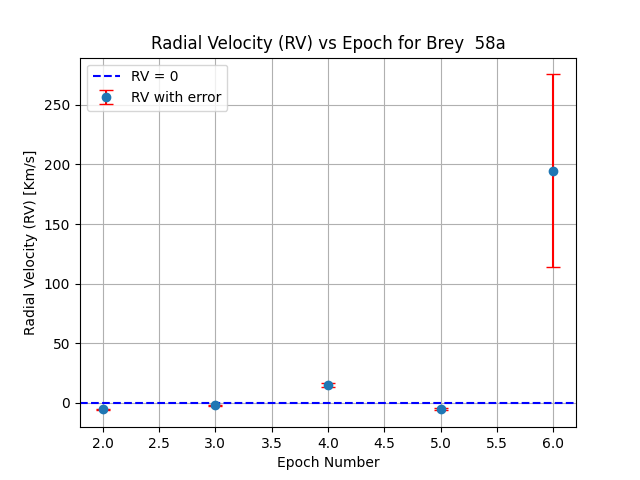

Absolute RV range for Brey  58a: 200.28
No file or folder named 'RVs' found in 'Data/HD  32228/epoch1/COMBINED/output'.
No RV data for star HD  32228, epoch 1. Skipping.
No output directory found for star 'HD  32228', epoch '7', band 'COMBINED'.
No RV data for star HD  32228, epoch 7. Skipping.


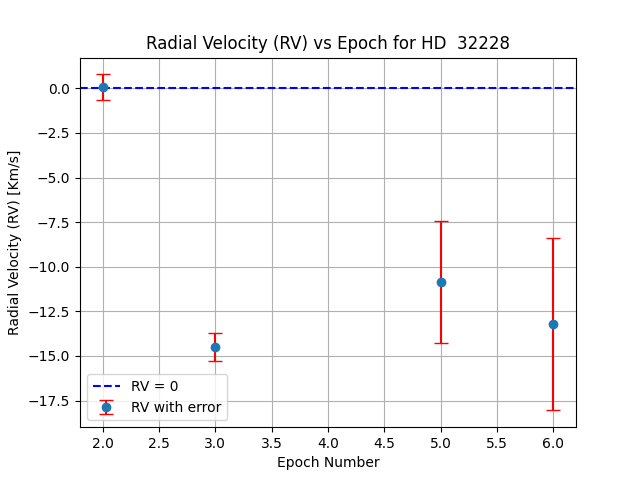

Absolute RV range for HD  32228: 14.55
No file or folder named 'RVs' found in 'Data/HD  32257/epoch1/COMBINED/output'.
No RV data for star HD  32257, epoch 1. Skipping.


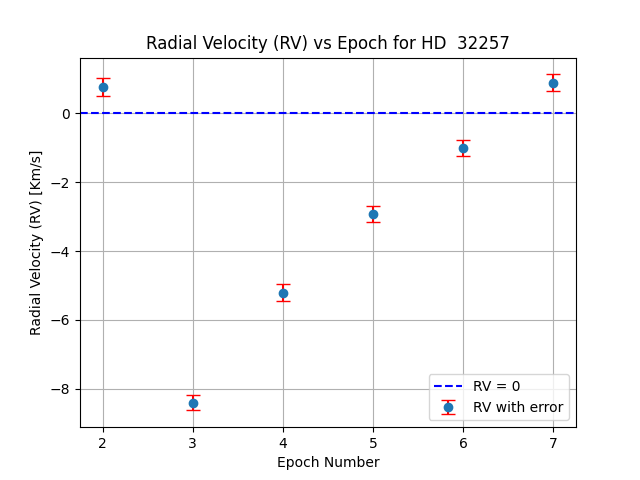

Absolute RV range for HD  32257: 9.27
No file or folder named 'RVs' found in 'Data/HD 269888/epoch1/COMBINED/output'.
No RV data for star HD 269888, epoch 1. Skipping.
No output directory found for star 'HD 269888', epoch '7', band 'COMBINED'.
No RV data for star HD 269888, epoch 7. Skipping.


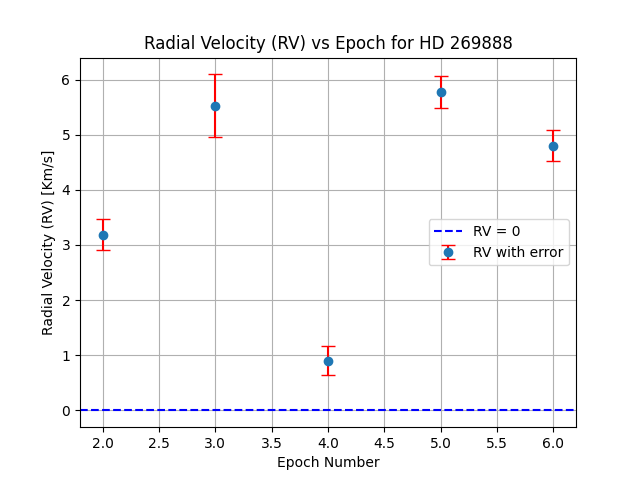

Absolute RV range for HD 269888: 4.87
No file or folder named 'RVs' found in 'Data/HD  36156/epoch1/COMBINED/output'.
No RV data for star HD  36156, epoch 1. Skipping.


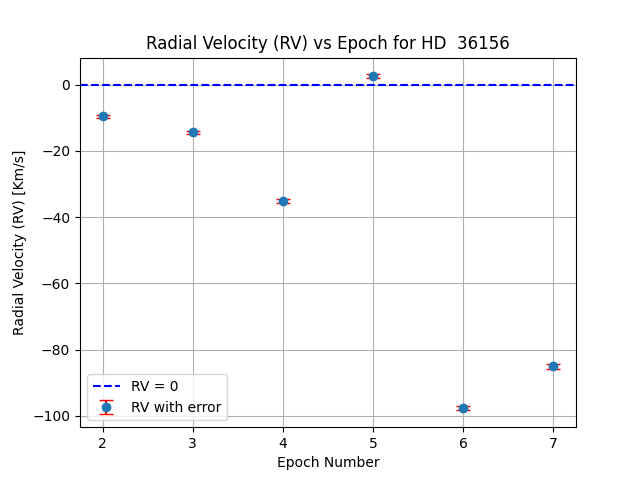

Absolute RV range for HD  36156: 100.23
No file or folder named 'RVs' found in 'Data/H2013 LMCe  584/epoch1/COMBINED/output'.
No RV data for star H2013 LMCe  584, epoch 1. Skipping.
No output directory found for star 'H2013 LMCe  584', epoch '7', band 'COMBINED'.
No RV data for star H2013 LMCe  584, epoch 7. Skipping.


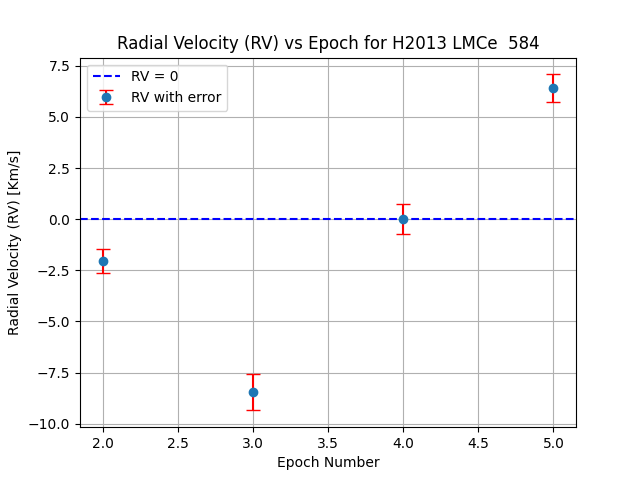

Absolute RV range for H2013 LMCe  584: 14.86
No file or folder named 'RVs' found in 'Data/RMC 140/epoch1/COMBINED/output'.
No RV data for star RMC 140, epoch 1. Skipping.


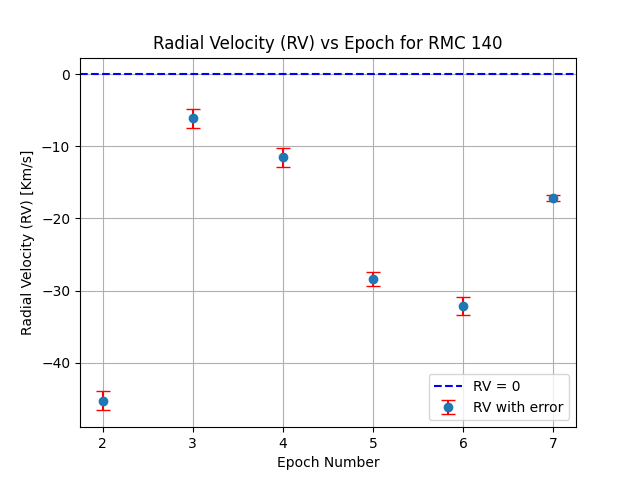

Absolute RV range for RMC 140: 39.19
No file or folder named 'RVs' found in 'Data/HD  32402/epoch1/COMBINED/output'.
No RV data for star HD  32402, epoch 1. Skipping.
No output directory found for star 'HD  32402', epoch '7', band 'COMBINED'.
No RV data for star HD  32402, epoch 7. Skipping.


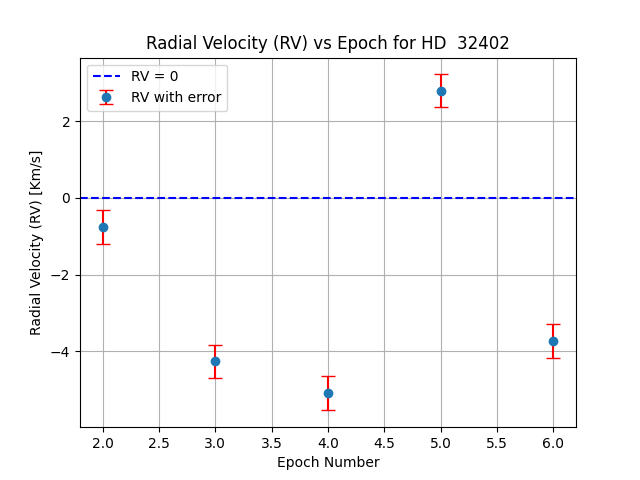

Absolute RV range for HD  32402: 7.89
No file or folder named 'RVs' found in 'Data/Brey  70a/epoch1/COMBINED/output'.
No RV data for star Brey  70a, epoch 1. Skipping.
No output directory found for star 'Brey  70a', epoch '6', band 'COMBINED'.
No RV data for star Brey  70a, epoch 6. Skipping.
No output directory found for star 'Brey  70a', epoch '7', band 'COMBINED'.
No RV data for star Brey  70a, epoch 7. Skipping.


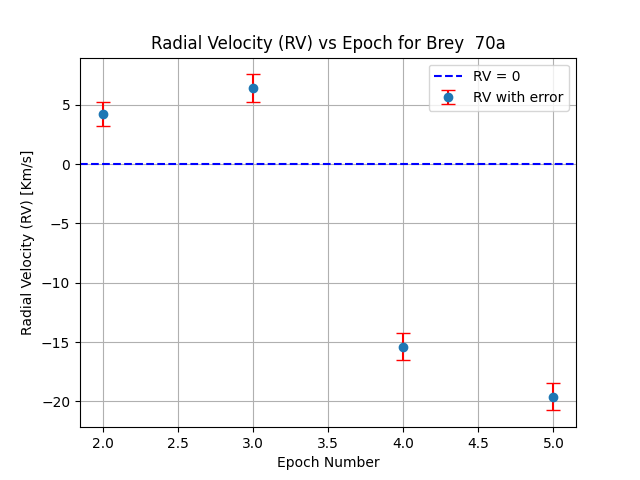

Absolute RV range for Brey  70a: 26.01
No file or folder named 'RVs' found in 'Data/Brey  16a/epoch1/COMBINED/output'.
No RV data for star Brey  16a, epoch 1. Skipping.
No output directory found for star 'Brey  16a', epoch '7', band 'COMBINED'.
No RV data for star Brey  16a, epoch 7. Skipping.


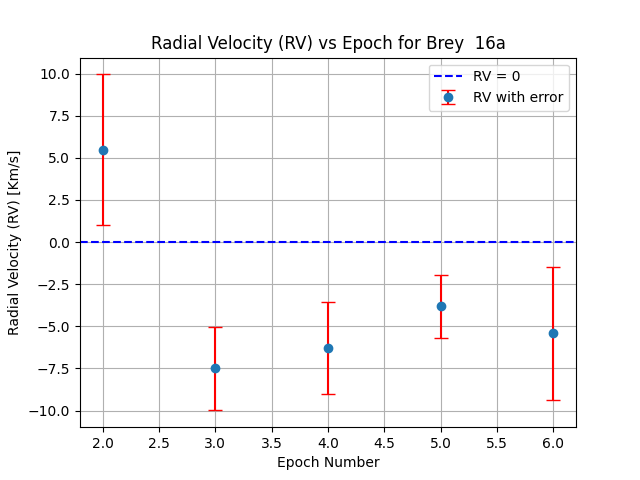

Absolute RV range for Brey  16a: 12.98
No file or folder named 'RVs' found in 'Data/Brey  93/epoch1/COMBINED/output'.
No RV data for star Brey  93, epoch 1. Skipping.
No output directory found for star 'Brey  93', epoch '6', band 'COMBINED'.
No RV data for star Brey  93, epoch 6. Skipping.
No output directory found for star 'Brey  93', epoch '7', band 'COMBINED'.
No RV data for star Brey  93, epoch 7. Skipping.


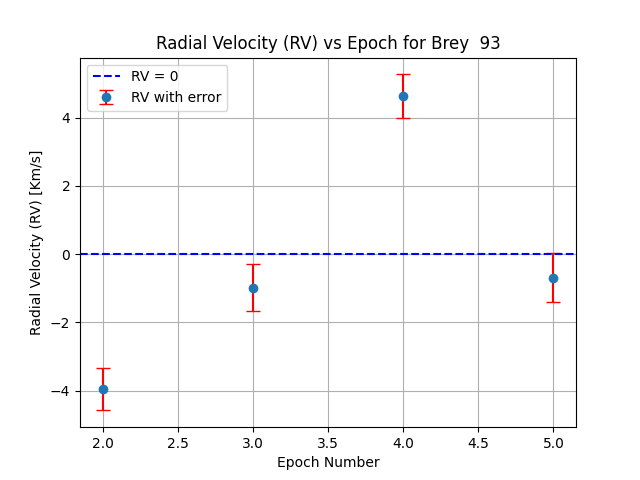

Absolute RV range for Brey  93: 8.58
No file or folder named 'RVs' found in 'Data/Brey  90a/epoch1/COMBINED/output'.
No RV data for star Brey  90a, epoch 1. Skipping.
No output directory found for star 'Brey  90a', epoch '7', band 'COMBINED'.
No RV data for star Brey  90a, epoch 7. Skipping.


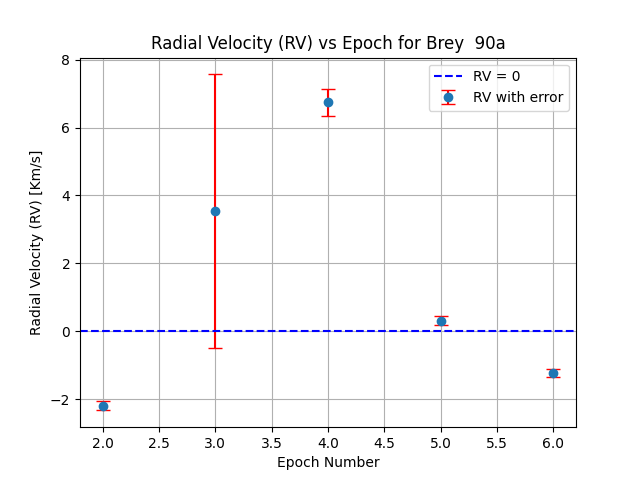

Absolute RV range for Brey  90a: 8.93
No file or folder named 'RVs' found in 'Data/HD 269891/epoch1/COMBINED/output'.
No RV data for star HD 269891, epoch 1. Skipping.


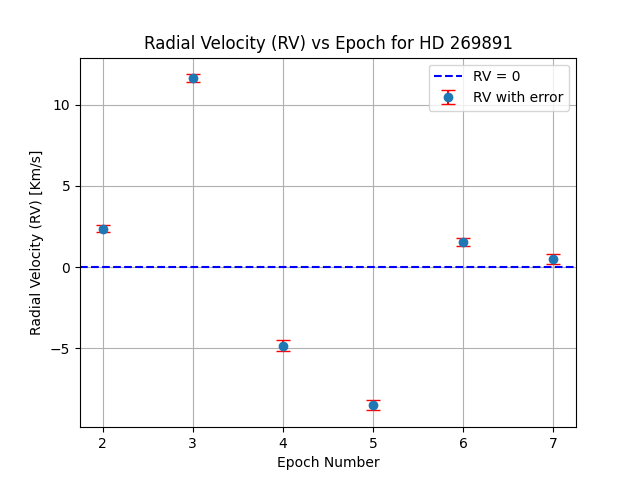

Absolute RV range for HD 269891: 20.14


In [15]:
import matplotlib.pyplot as plt
import numpy as np

all_stars_info = []
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    RVs = []
    RVs_errs = []
    epochs = []

    # Gather RV data
    for i in range(1, 8):
        try:
            RV = star.load_property('RVs', epoch_num=i, band='COMBINED')
            RVs.append(RV['full_RV'])
            RVs_errs.append(RV['full_RV_err'])
            epochs.append(i)
        except Exception as e:
            print(f"No RV data for star {star_name}, epoch {i}. Skipping.")
            continue

    if len(RVs) > 0:
        # Plot RV vs. epoch with error bars
        RV_range = abs(max(RVs) - min(RVs))
        BAT_ID = star.BAT_ID
        is_binary = "Yes" if RV_range > 20 else "No"

        # Append the star's information to the list
        all_stars_info.append([star_name, BAT_ID, f"{RV_range:.2f}", is_binary])
        plt.figure()
        plt.errorbar(epochs, RVs, yerr=RVs_errs, fmt='o', ecolor='red', capsize=5, label="RV with error")
        plt.axhline(0, color='blue', linestyle='dashed', label="RV = 0")
        plt.title(f"Radial Velocity (RV) vs Epoch for {star_name}")
        plt.xlabel("Epoch Number")
        plt.ylabel("Radial Velocity (RV) [Km/s]")
        plt.grid(True)
        plt.legend()
        plt.show()

        # Calculate and print the absolute range
        RV_range = abs(max(RVs) - min(RVs))
        print(f"Absolute RV range for {star_name}: {RV_range:.2f}")
    else:
        print(f"No RV data available for star {star_name}.")

    

In [12]:
import pandas as pd

# Create a pandas DataFrame from the list
columns = ["Star Name", "BAT_ID", "Absolute RV Range", "Binary?"]
stars_df = pd.DataFrame(all_stars_info, columns=columns)

# Print the table nicely in the console
print("Summary of Stars and Binary Classification:")
# print(stars_df)

# Optionally, display a styled version of the DataFrame
try:
    from IPython.display import display
    styled_table = stars_df.style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#D3D3D3"), ("font-weight", "bold")]},
            {"selector": "tbody td", "props": [("border", "1px solid #ddd")]},
        ]
    ).set_caption("Summary of Stars and Binary Classification")
    display(styled_table)
except ImportError:
    print("Install Jupyter/IPython to enable styled DataFrame display.")

Summary of Stars and Binary Classification:


# Simulations

## using LMC WC4 14-10 template from POwR to simulate SB1 and calc minimum SNR needed for 3km/s certainty for each emssion line

In [6]:
S2Ns = [1,2,3,4,5,7,10,12,14,17,20,30,40,50,100,120,150]
emission_lines = [[[3350.,3500.]],[[4560.,4800.]],[[5700.,6000.]],[[6460.,6650.]],[[7500.,7900.]],[[8100.,8400.]],[[9266.,9475]],[[3115,3230]],[[3645,3730]],[[3788,3863]],[[4415,4520]],[[5246,5326]],[[5380,5535]],[[6960,7155]],[[8800,8915]]]

In [9]:
import multiprocess as mp
import numpy as np
# from your_simulation_module import sc  # Replace with your actual import

def process_pair(params):
    """
    Process a single pair of S2N and CrossCorRangeA.
    """
    S2N, CrossCorRangeA = params
    sim = sc(S2N=S2N, lamB=3100., lamR=9990.)
    sim.run_simulation(overwrite=False)

    temp_path = 'Data/LMC WC Temaplates/lmc-wc_14-10_line.txt'
    template_wave, template_flux = sim.load_two_column_file(temp_path)

    file_name = f'CCRA_{CrossCorRangeA}_RVs'
    try:
        results = sim.load_property(file_name)
    except:
        results = np.array(sim.run_CCF(template_wave, template_flux, CrossCorRangeA=CrossCorRangeA), dtype='float')
        sim.save_property(file_name,results)
    sigma = np.std(results[:, 0])
    return CrossCorRangeA, np.array([S2N, sigma])

def run_multiprocessing(S2Ns, emission_lines):
    # Create pairs of S2Ns and CrossCorRangeA
    params = [(S2N, line) for line in emission_lines for S2N in S2Ns]
    
    # Initialize multiprocessing pool
    with mp.Pool(processes=mp.cpu_count()) as pool:
        results = pool.map(process_pair, params)
    
    # Organize results into the desired format
    total_results = {}
    for line in emission_lines:
        total_results[str(line)] = [result[1] for result in results if result[0] == line]
    
    return total_results

# Running the multiprocessing code in Jupyter
if __name__ == "__main__":
    # S2Ns = [10, 20, 50, 100]  # Example S2N values
    # emission_lines = ['line1', 'line2', 'line3']  # Replace with actual lines
    
    # Run multiprocessing and collect results
    total_results = run_multiprocessing(S2Ns, emission_lines)
    print(total_results)


[INFO] Simulation files already exist in 'simulations/SNR50'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR1'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR40'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR12'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR10'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR14'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR2'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR3'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR4'. Set overwrite=True to rerun the simulation.[INFO] Simulation files already exist in 'simulations/SNR12

/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/CCF.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  RV_error = np.sqrt(-1. / (N * CFFdvdvAtMax * CCFAtMax / (1 - CCFAtMax**2)))
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/CCF.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  RV_error = np.sqrt(-1. / (N * CFFdvdvAtMax * CCFAtMax / (1 - CCFAtMax**2)))
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/CCF.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  RV_error = np.sqrt(-1. / (N * CFFdvdvAtMax * CCFAtMax / (1 - CCFAtMax**2)))
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/CCF.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  RV_error = np.sqrt(-1. / (N * CFFdvdvAtMax * CCFAtMax / (1 - CCFAtMax**2)))
/Users/guysh

Property saved at simulations/SNR120/output/CCRA_[[5700.0, 6000.0]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR150'. Set overwrite=True to rerun the simulation.
Property saved at simulations/SNR120/output/CCRA_[[4560.0, 4800.0]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR150'. Set overwrite=True to rerun the simulation.
Property saved at simulations/SNR120/output/CCRA_[[3350.0, 3500.0]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR150'. Set overwrite=True to rerun the simulation.
Property saved at simulations/SNR120/output/CCRA_[[7500.0, 7900.0]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR1'. Set overwrite=True to rerun the simulation.
[INFO] Simulation files already exist in 'simulations/SNR2'. Set overwrite=True to rerun the simulation.
[INFO] Simulation files already exist in 'simulations/SNR3'. Set overwrite=True to rerun the simulation.
[INFO] Simulation files already exist in 'simulations/SNR4'.

/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/CCF.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  RV_error = np.sqrt(-1. / (N * CFFdvdvAtMax * CCFAtMax / (1 - CCFAtMax**2)))
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Thesis-codes/CCF.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  RV_error = np.sqrt(-1. / (N * CFFdvdvAtMax * CCFAtMax / (1 - CCFAtMax**2)))


Property saved at simulations/SNR120/output/CCRA_[[3788, 3863]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR150'. Set overwrite=True to rerun the simulation.
Property saved at simulations/SNR120/output/CCRA_[[5246, 5326]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR150'. Set overwrite=True to rerun the simulation.
Property saved at simulations/SNR150/output/CCRA_[[5700.0, 6000.0]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR1'. Set overwrite=True to rerun the simulation.
[INFO] Simulation files already exist in 'simulations/SNR2'. Set overwrite=True to rerun the simulation.
[INFO] Simulation files already exist in 'simulations/SNR3'. Set overwrite=True to rerun the simulation.
Property saved at simulations/SNR150/output/CCRA_[[4560.0, 4800.0]]_RVs.npz
[INFO] Simulation files already exist in 'simulations/SNR1'. Set overwrite=True to rerun the simulation.
[INFO] Simulation files already exist in 'simulations/SNR2'. Set overw

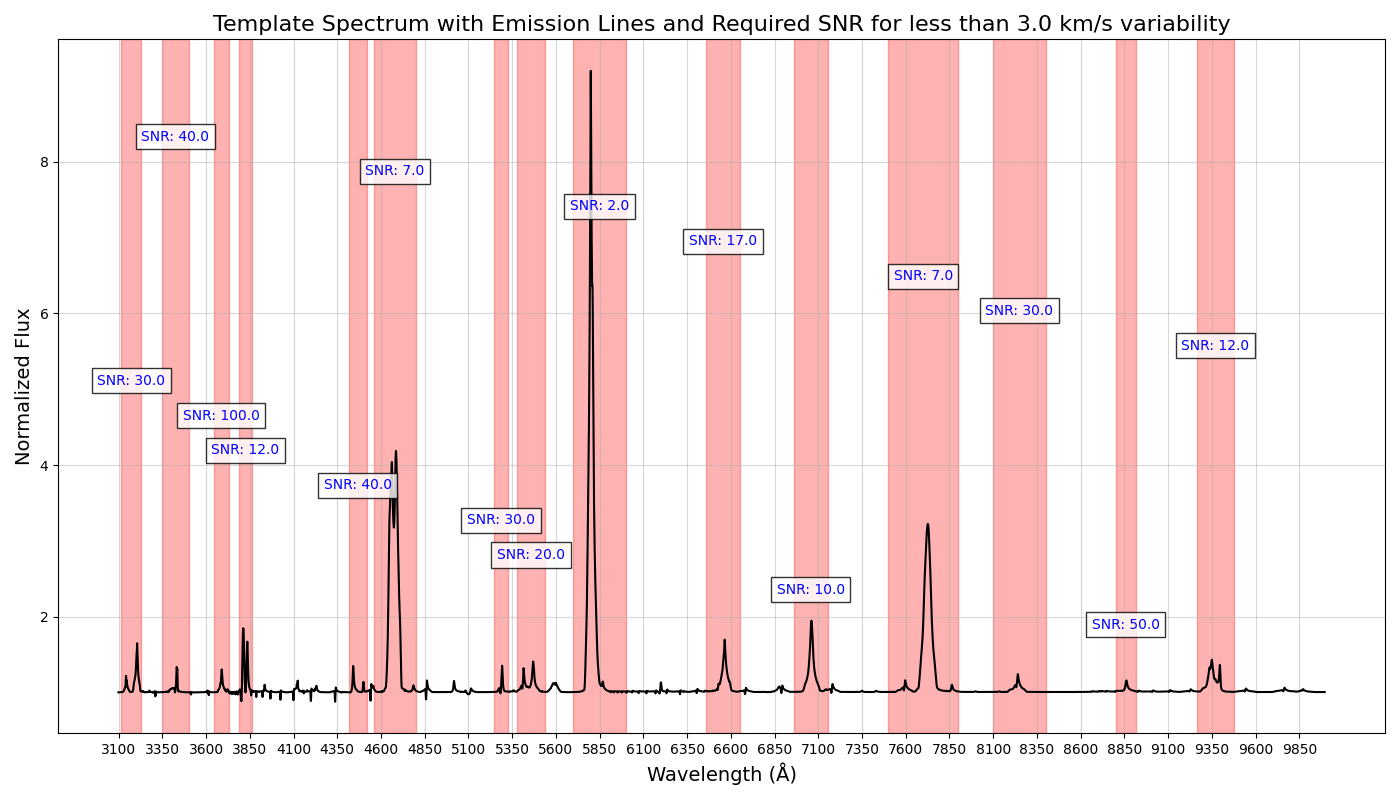

In [12]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import re

def plot_template_with_snr_improved(template_wave, template_flux, total_results, threshold=3.0):
    """
    Plots the template spectrum, highlights each emission line, and annotates the required SNR
    for each line to achieve less than the given threshold in RV variation.

    Parameters:
        template_wave (array): Wavelength array of the template.
        template_flux (array): Flux array of the template.
        total_results (dict): Dictionary containing results for each emission line.
                              Keys are emission line ranges (e.g., 'start-end'),
                              values are lists of [S2N, sigma] pairs.
        threshold (float): The threshold for RV variation in km/s. Defaults to 3.0.
    """
    plt.figure(figsize=(14, 8))

    # Plot the template spectrum
    plt.plot(template_wave, template_flux, color='black', linewidth=1.5)

    # Keep track of y-coordinates to avoid overlap
    used_positions = []

    # Iterate through each emission line and annotate the required SNR
    for emission_line, results in total_results.items():
        # Convert results to NumPy array for easier manipulation
        results_array = np.array(results)
        S2Ns, sigmas = results_array[:, 0], results_array[:, 1]

        # Find the minimum SNR where the sigma is below the threshold
        valid_indices = np.where(sigmas < threshold)[0]
        if valid_indices.size > 0:
            required_snr = S2Ns[valid_indices[0]]
        else:
            required_snr = "N/A"

        # Highlight the emission line
        emission_start, emission_end = map(float, re.findall(r"[-+]?\d*\.\d+|\d+", emission_line))
        plt.axvspan(emission_start, emission_end, color='red', alpha=0.3)
        mid_point = (emission_start + emission_end) / 2

        # Determine y-coordinate for the text box
        y_position = max(template_flux) * 0.9
        while y_position in used_positions:
            y_position -= max(template_flux) * 0.05  # Adjust to avoid overlap
        used_positions.append(y_position)

        # Annotate the SNR
        plt.text(mid_point, y_position, f"SNR: {required_snr}", 
                 color='blue', fontsize=10, ha='center', bbox=dict(facecolor='white', alpha=0.8))

    # Add title, labels, and grid
    plt.title(f"Template Spectrum with Emission Lines and Required SNR for less than {threshold} km/s variability", fontsize=16)
    plt.xlabel("Wavelength (Å)", fontsize=14)
    plt.ylabel("Normalized Flux", fontsize=14)
    
    # Improve X-axis resolution
    plt.xticks(np.arange(min(template_wave)+1, max(template_wave), 250))  # 20 ticks for better resolution
    plt.grid(alpha=0.5)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
# Replace these with your actual data
sim = sc()
temp_path = 'Data/LMC WC Temaplates/lmc-wc_14-10_line.txt'
template_wave, template_flux = sim.load_two_column_file(temp_path)
plot_template_with_snr_improved(template_wave, template_flux, total_results)


# Combing Spectra

In [3]:
%matplotlib widget
obs = obsm()
star_name = specs.star_names[20]
star = obs.load_star_instance(star_name)
# star.list_available_properties()
# data = star.load_property('aligment_data',3,'COMBINED2')
# star.combine_fits_files(3)

In [15]:
text = ''
for star_name in specs.star_names:
    text += f'{star_name}\n'


print(text)

Brey  70
Brey  83
HD  38029
HD  37248
Brey  95a
MNM2014 LMC195-1
HD  32125
HD  37026
HD 269818
HD  38448
HD  38030
HD  37680
Brey  58a
HD  32228
HD  32257
HD 269888
HD  36156
H2013 LMCe  584
RMC 140
HD  32402
Brey  70a
Brey  16a
Brey  93
Brey  90a
HD 269891



In [3]:
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    epcoh_nums = [int(key[-1]) for key in specs.obs_file_names[star_name].keys()]
    for epoch_num in epcoh_nums:
        star.combine_fits_files(epoch_num=epoch_num, overwrite = True, backup = True, save = True)
        print(f'finished epoch{epoch_num}')

Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data loaded from Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
combined_overlap_indices is [11737 11738 11739 ... 12851 12852 12853]
first the mean_flux_combined was 5.252404150708129e-15 and mean_flux_current is 5.7111491735619096e-15
entered case where mean_flux_combined < mean_flux_current
mean_flux_finer is 5.083104873739044e-15 and mean_flux_coarser is 5.580567866657282e-15
Aligned spectra in overlap between 533.66 and 555.98 Å.
Alignment factor: 1.0873, Alignment score: 1.2965 and Alignment scoreafter interpolation: 0.0192
combined_overlap_indices is [34755 34756 34757 ... 36052 36053 36054]
first the mean_flux_combined was 1.2546583151673514e-15 and

Data/MNM2014 LMC195-1/epoch4/UVB/ADP.2021-09-20T19_54_28.010.fits
Data loaded from Data/MNM2014 LMC195-1/epoch4/UVB/ADP.2021-09-20T19_54_28.010.fits
Data/MNM2014 LMC195-1/epoch4/VIS/ADP.2021-09-20T19_54_28.032.fits
Data loaded from Data/MNM2014 LMC195-1/epoch4/VIS/ADP.2021-09-20T19_54_28.032.fits
Data/MNM2014 LMC195-1/epoch4/NIR/ADP.2021-09-20T19_54_27.947.fits
Data loaded from Data/MNM2014 LMC195-1/epoch4/NIR/ADP.2021-09-20T19_54_27.947.fits


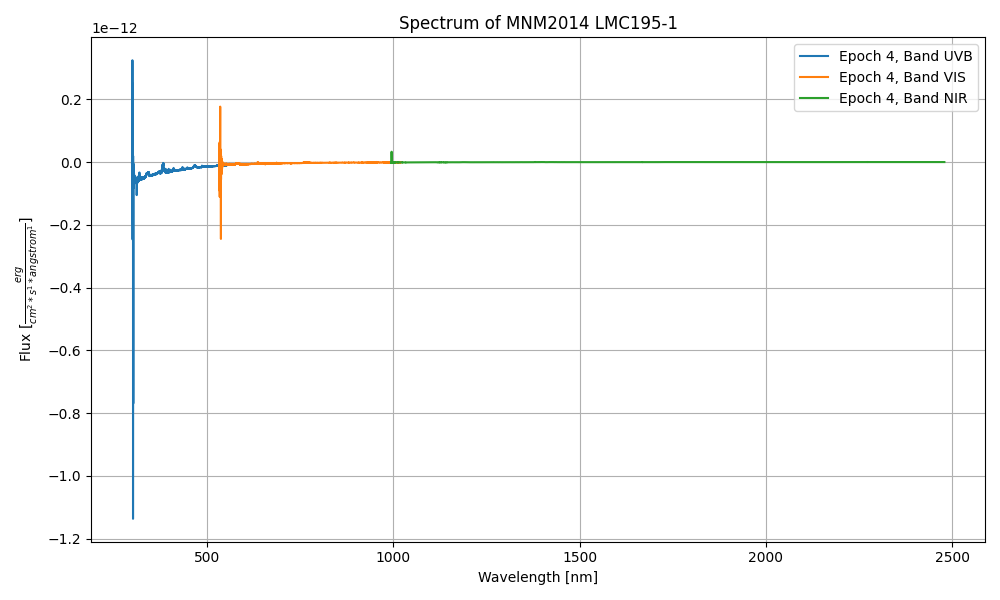

In [10]:
%matplotlib widget
star_name = specs.star_names[5]
star = obs.load_star_instance(star_name)
star.plot_spectra(epoch_nums=4,bands = ['UVB','VIS','NIR'])
# star.plot_spectra(2)
# star.plot_spectra(3)
# star.plot_spectra(4)
# star.plot_spectra(5)
# star.plot_spectra(6)
# star.plot_spectra(7)

# Printing data on stars

In [2]:
obs = obsm()

In [4]:
data = []
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    data.append([star_name, star.spectral_type, star.BAT_ID])

df = pd.DataFrame(data, columns=["Star Name", "Spectral Type", "BAT99 ID"])
print(df)

           Star Name   Spectral Type BAT99 ID
0           Brey  70            WR D       87
1           Brey  83           WC4 C      115
2          HD  38029            None       85
3          HD  37248        WC4+O9 C       53
4          Brey  95a            G: E      127
5   MNM2014 LMC195-1           WO2 C     None
6          HD  32125            WC C        9
7          HD  37026            WC D       52
8          HD 269818            WR D       70
9          HD  38448            WR C      125
10         HD  38030            WC D       84
11         HD  37680            WC D       61
12         Brey  58a            WC D       69
13         HD  32228   WC4+O9.5II: C       10
14         HD  32257            WC D        8
15         HD 269888            WR D       90
16         HD  36156            WC D       34
17   H2013 LMCe  584           WO4 C     None
18           RMC 140  WN7+WC4/5pec C      101
19         HD  32402            WC D       11
20         Brey  70a      WN4b/WCE

# using astroquery to get data on stars

In [16]:
from astroquery.vizier import Vizier

# Check catalog metadata
metadata = Vizier.get_catalogs("J/ApJ/931/157")
print(metadata)
for table in metadata:
    print(table)
    print(f"Table: {table['Name']}")
    print(f"Columns: {table.colnames}")


TableList with 1 tables:
	'0:J/ApJ/931/157/sample' with 11 column(s) and 8 row(s) 
   Name    SpT f_SpT   RAJ2000   ... Ref   sp     SimbadName    
                                 ...                            
---------- --- ----- ----------- ... ---- --- ------------------
  BAT99-61 WC4       05 34 19.24 ... A22b  sp           BAT99 61
  BAT99-90 WC4       05 37 44.64 ... A22b  sp           BAT99 90
Sanduleak2 WO3       05 39 34.29 ... A22b  sp          BAT99 123
  LMC195-1 WO2     b 05 18 10.33 ... A22b  sp [MNM2014] LMC195-1
   BAT99-8 WC4       04 56 02.89 ... A22a  sp            BAT99 8
   BAT99-9 WC4       04 56 11.10 ... A22a  sp            BAT99 9
  BAT99-11 WC4       04 57 24.08 ... A22a  sp           BAT99 11
  BAT99-52 WC4       05 30 12.16 ... A22a  sp           BAT99-52
Table:    Name   
----------
  BAT99-61
  BAT99-90
Sanduleak2
  LMC195-1
   BAT99-8
   BAT99-9
  BAT99-11
  BAT99-52
Columns: ['Name', 'SpT', 'f_SpT', 'RAJ2000', 'DEJ2000', 'Vmag', 'VMag', 'AName', 'Ref

In [18]:
viz_res = viz.query_object(object_name = 'BAT99-52', catalog='J/ApJ/931/157')
print(viz_res)

Empty TableList


In [12]:
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd

# Initialize results table
results = []

# Example star list from specs
BAT99_star_names = {}
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    BAT99_star_names[star_name] = f'BAT99 {star.BAT_ID}'

# Vizier setup
viz = Vizier(columns=["SpType"])
vizier_catalogs = ["J/ApJ/863/181",'J/ApJ/931/157','J/ApJ/888/54','J/AJ/158/192']  # Galactic Wolf-Rayet stars catalog

# Add necessary fields to SIMBAD query
simbad = Simbad()
simbad.add_votable_fields("sptype", "ra", "dec")  # Add necessary fields

# Iterate over star names
for star_name in specs.star_names:
    star_result = {"Star Name": star_name,"BAT99 name": BAT99_star_names[star_name], "SIMBAD": None}
    star_name = BAT99_star_names[star_name]
    # Query SIMBAD
    try:
        sim_res = simbad.query_object(star_name)
        if sim_res is not None and "SP_TYPE" in sim_res.colnames:
            star_result["SIMBAD"] = sim_res["SP_TYPE"][0]  # Spectral type
    except Exception as e:
        print(f"SIMBAD query failed for {star_name}: {e}")

    # Query Vizier by name, then fallback to coordinates
    for vizier_catalog in vizier_catalogs:
        try:
            viz_res = viz.query_object(star_name, catalog=vizier_catalog)
            if viz_res is None or len(viz_res) == 0:
                # print('BAT99-' + str(star_name.split(' ')[1]))
                viz_res = viz.query_object('BAT99-' + str(star_name.split(' ')[1]), catalog=vizier_catalog)
                print(f"Vizier query by name failed for {star_name} in catalog {vizier_catalog}, attempting by coordinates...")
                # Fetch coordinates from SIMBAD
                if sim_res is not None:
                    ra, dec = sim_res["RA"][0], sim_res["DEC"][0]
                    coords = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))
                    if star_name == 'BAT99 52':
                        print(f'RA: {ra}')
                        print(f'DEC: {dec}')
                        print(f'coords: {coords}')
                    viz_res = viz.query_region(coords, radius=5000 * u.arcsec, catalog=vizier_catalog)
            if viz_res is not None and len(viz_res) > 0:
                table = viz_res[0]
                if "SpType" in table.colnames:
                    star_result[vizier_catalog] = table["SpType"][0]  # Spectral type
            else:
                print(f'Didnt find {star_name} in vizier catalog {vizier_catalog}')
        except Exception as e:
            print(f"Vizier query failed for {star_name}: {e}")

    # Append results
    results.append(star_result)

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display table
from tabulate import tabulate
print(tabulate(df, headers="keys", tablefmt="pretty"))


BAT99-87
Vizier query by name failed for BAT99 87 in catalog J/ApJ/931/157, attempting by coordinates...
Didnt find BAT99 87 in vizier catalog J/ApJ/931/157
BAT99-87
Vizier query by name failed for BAT99 87 in catalog J/ApJ/888/54, attempting by coordinates...
Didnt find BAT99 87 in vizier catalog J/ApJ/888/54
BAT99-87
Vizier query by name failed for BAT99 87 in catalog J/AJ/158/192, attempting by coordinates...
BAT99-115
Vizier query by name failed for BAT99 115 in catalog J/ApJ/931/157, attempting by coordinates...
Didnt find BAT99 115 in vizier catalog J/ApJ/931/157
BAT99-115
Vizier query by name failed for BAT99 115 in catalog J/ApJ/888/54, attempting by coordinates...
Didnt find BAT99 115 in vizier catalog J/ApJ/888/54
BAT99-85
Vizier query by name failed for BAT99 85 in catalog J/ApJ/931/157, attempting by coordinates...
Didnt find BAT99 85 in vizier catalog J/ApJ/931/157
BAT99-85
Vizier query by name failed for BAT99 85 in catalog J/ApJ/888/54, attempting by coordinates...
Didnt

# Extracting data form fits files 

In [5]:
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)

In [10]:
fits_file = star.load_observation(1,'NIR')
wave = fits_file.data['WAVE'][0]
reduced_flux = fits_file.data['FLUX_REDUCED'][0]
print(len(wave))
print(len(reduced_flux))
print(reduced_flux)

Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
24750
24750
[2261.75756836 3470.08886719 2000.34106445 ...  935.94451904  493.60571289
 3229.68554688]


In [7]:
fits_file.print_file_info()

Opened FITS file: Data/Brey  70/epoch1/COMBINED/combined_bands.fits
Number of HDUs: 2
HDU 0: PrimaryHDU
------------------------------------------------------------
Header:
SIMPLE = True
BITPIX = 8
NAXIS = 0
EXTEND = True
------------------------------------------------------------
Image Data Shape: None
Image Data Type: None
HDU 1: BinTableHDU
------------------------------------------------------------
Header:
XTENSION = BINTABLE
BITPIX = 8
NAXIS = 2
NAXIS1 = 3139292
NAXIS2 = 1
PCOUNT = 0
GCOUNT = 1
TFIELDS = 7
TTYPE1 = WAVE
TFORM1 = 60371D
TUNIT1 = nm
TTYPE2 = FLUX
TFORM2 = 60371D
TUNIT2 = erg cm**(-2) s**(-1) angstrom**(-1)
TTYPE3 = ERR
TFORM3 = 60371D
TUNIT3 = erg cm**(-2) s**(-1) angstrom**(-1)
TTYPE4 = QUAL
TFORM4 = 60371J
TTYPE5 = SNR
TFORM5 = 60371D
TTYPE6 = FLUX_REDUCED
TFORM6 = 60371D
TUNIT6 = adu
TTYPE7 = ERR_REDUCED
TFORM7 = 60371D
TUNIT7 = adu
DISPELEM = COMBINED
NELEM = 60371
------------------------------------------------------------
Table Columns:
Name: WAVE, Format: 